<h1 style="color:red">lec 104:-Typical scikitlearn Workflow</h1>

# Introduction to Scikit-Learn (sklearn)

This notebook demonstrates some of the most useful functions of the beautiful Scikit-Learn library

What we are going to cover:

0. An end-to-end Scikit-Learn workflow
1. Getting the data ready
2. Choose the right estimator/algorithm for our problems
3. Fit the model/algorithm/estimator and use it to make predictions on our data
4. Evaluating a model
5. Save and load a trained model
6. Putting it all together!

## 0. An end-to-end Scikit-Learn workflow


In [5]:
# Let's listify the contents
what_were_covering = [
    "0. An end-to-end Scikit-Learn workflow",
    "1. Getting the data ready",
    "2. Choose the right estimator/algorithm for our problems",
    "3. Fit the model/algorithm and use it to make predictions on our data",
    "4. Evaluating a model",
    "5. Improve a model",
    "6. Save and load a trained model",
    "7. Putting it all together!"]


In [6]:
what_were_covering

['0. An end-to-end Scikit-Learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together!']

In [7]:
# 1. Get the data ready
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
heart_disease = pd.read_csv("./teacher-materials/data/heart-disease.csv")
heart_disease

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

In [8]:
# Create X (features matrix)
X = heart_disease.drop("target",axis=1)

# Create Y(labels)
Y = heart_disease["target"]

In [9]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# We'll keep the default hyperparameters
clf.get_params() # to check which parameters it is using

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [10]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)
# test_size = 0.2 means 80 percent data we are using is for train

In [11]:
clf.fit(X_train,Y_train);

In [12]:
# make a prediction
#Y_label = clf.predict(np.array([0,2,3,4]))

In [13]:
Y_preds=clf.predict(X_test)
Y_preds

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0])

In [14]:
Y_test

84     1
257    0
123    1
158    1
78     1
      ..
241    0
139    1
44     1
23     1
237    0
Name: target, Length: 61, dtype: int64

In [15]:
# 4. Evalauate the model on the training data and the test data
clf.score(X_train,Y_train)

1.0

In [16]:
clf.score(X_test,Y_test)

0.8524590163934426

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(Y_test,Y_preds))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        30
           1       0.89      0.81      0.85        31

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



In [18]:
confusion_matrix(Y_test,Y_preds)

array([[27,  3],
       [ 6, 25]])

In [19]:
accuracy_score(Y_test,Y_preds)

0.8524590163934426

In [20]:
# 5. Improve a model
# Try different amount of n_estimators
np.random.seed(42)
for i in range (10,100,10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train,Y_train)
    print(f"Model accuracy on test set: {clf.score(X_test,Y_test)*100:.2f}%")
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 85.25%

Trying model with 20 estimators...
Model accuracy on test set: 86.89%

Trying model with 30 estimators...
Model accuracy on test set: 81.97%

Trying model with 40 estimators...
Model accuracy on test set: 81.97%

Trying model with 50 estimators...
Model accuracy on test set: 86.89%

Trying model with 60 estimators...
Model accuracy on test set: 86.89%

Trying model with 70 estimators...
Model accuracy on test set: 81.97%

Trying model with 80 estimators...
Model accuracy on test set: 86.89%

Trying model with 90 estimators...
Model accuracy on test set: 86.89%



In [21]:
# 6. Save a model and load it
import pickle

pickle.dump(clf,open("random_foresr_model_1.pkl",'wb'))

In [22]:
loaded_model = pickle.load(open("random_foresr_model_1.pkl",'rb'))
loaded_model.score(X_test,Y_test) #same as n_estimators = 90 because
# that is the last

0.8688524590163934

<h1 style="color:red">lec 105:-Optional Debugging Warnings in Jupyter</h1>

In [23]:
import warnings
warnings.filterwarnings("ignore")
# by this the warnings does not appears anymore in jupyter notebook
# only do this when warnings are not significant/not helpful
warnings.filterwarnings("default") # for default

In [24]:
import sklearn
sklearn.show_versions()


System:
    python: 3.13.9 | packaged by conda-forge | (main, Oct 22 2025, 23:12:41) [MSC v.1944 64 bit (AMD64)]
executable: C:\users\kaush\desktop\ml_course\sample_project\env\python.exe
   machine: Windows-10-10.0.19045-SP0

Python dependencies:
      sklearn: 1.7.2
          pip: 25.2
   setuptools: 80.9.0
        numpy: 2.3.4
        scipy: 1.16.2
       Cython: None
       pandas: 2.3.3
   matplotlib: 3.10.7
       joblib: 1.5.2
threadpoolctl: 3.6.0

Built with OpenMP: True

threadpoolctl info:
       user_api: blas
   internal_api: mkl
    num_threads: 4
         prefix: mkl_rt
       filepath: C:\Users\kaush\Desktop\ML_course\sample_project\env\Library\bin\mkl_rt.2.dll
        version: 2024.2.2-Product
threading_layer: intel

       user_api: openmp
   internal_api: openmp
    num_threads: 8
         prefix: vcomp
       filepath: C:\Users\kaush\Desktop\ML_course\sample_project\env\vcomp140.dll
        version: None


<hr>

"conda env list"
"conda list" -> to show all the packages in conda 
how to upgrade versions/packages in conda
open cmd -> navigate to our folder -> "conda activate env_name"
-> "conda list" for packages
now our scikit learn version is 1.7.1 how to get back to 0.22

-> "conda update python" to update all packages
-> "conda update package_name" to update specific package
-> "conda search scikit-learn --info" to see which python version is compatible for which scikit-learn version it gives detailed info
-> "conda list python" to check our python version
-> "conda uninstall scikit-learn python" to remove packages of these
we do this for installing specific version of all packages so they all can be compatible with each other 
-> "conda install python=3.6.9 scikit-learn=0.22 matplotlib numpy pandas jupyter"
-> "conda list scikit-learn" to check versions

<a href="https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-pkgs.html"><h6 style="color:blue">Managing packages-conda -> for managing commands </h6></a>

<h1 style="color:red">lec 106:-Getting Your Data Ready Splitting Your Data</h1>

In [25]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Getting our data ready to be used with machine learning

Three main things we have to do:

    1.Split the data into features and labels (usually `x` & `y`)
    2. Filling (also called imputing) or disregarding missing values
    3. Converting non-numerical values to numerical values (also called feature encoding) because machine only understands 0's and 1's

In [26]:
heart_disease.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [27]:
X = heart_disease.drop("target",axis=1)
Y = heart_disease["target"]

In [28]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [29]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)

In [30]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((242, 13), (61, 13), (242,), (61,))

## lec 107 - quick tip clean transform reduce 

in data science or machine learning having more data is not necessary a good thing. Because we want good data there can be non useful data.
we want data on which we can take real actionable steps

clean data -> Transform data -> reduce data(dimensionality reduction/column reduction)


<h1 style="color:red">lec 108:-Getting Your Data Ready Convert Data To Numbers</h1>

## 1.1 Make sure it's all numerical

In [31]:
car_sales = pd.read_csv("teacher-materials/data/car-sales-extended.csv")
car_sales.head()

Make Colour  Odometer (KM)  Doors  Price
0   Honda  White          35431      4  15323
1     BMW   Blue         192714      5  19943
2   Honda  White          84714      4  28343
3  Toyota  White         154365      4  13434
4  Nissan   Blue         181577      3  14043

In [32]:
len(car_sales)

1000

In [33]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [34]:
# Split into X/Y
X = car_sales.drop("Price",axis=1)
Y = car_sales.Price

# Split into training and test
X_train,X_test,Y_train,Y_test = train_test_split(X,
                                                 Y,
                                                 test_size=0.2)

In [35]:
# Build macchine learning model
from sklearn.ensemble import RandomForestRegressor #for predicting number

model = RandomForestRegressor()
model.fit(X_train,Y_train)
model.score(X_test,Y_test)

ValueError: could not convert string to float: 'Toyota'

In [ ]:
# we have to convert non-numeric to numeric

# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

## Use RandomForestRegressor when your target variable is numeric.
## Use RandomForestClassifier when your target variable is categorical.

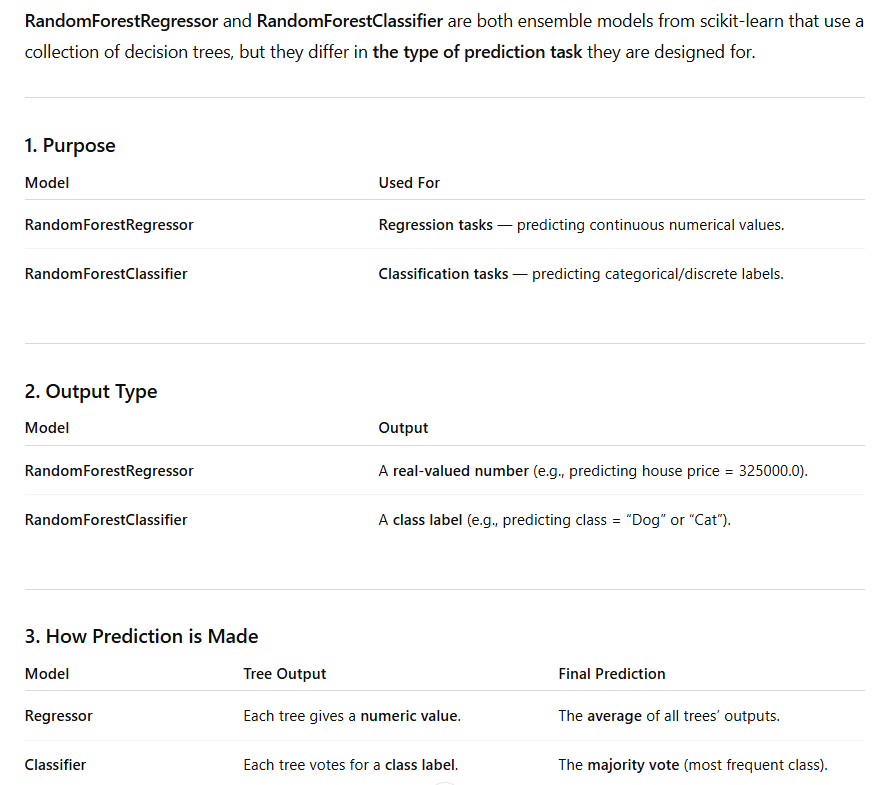

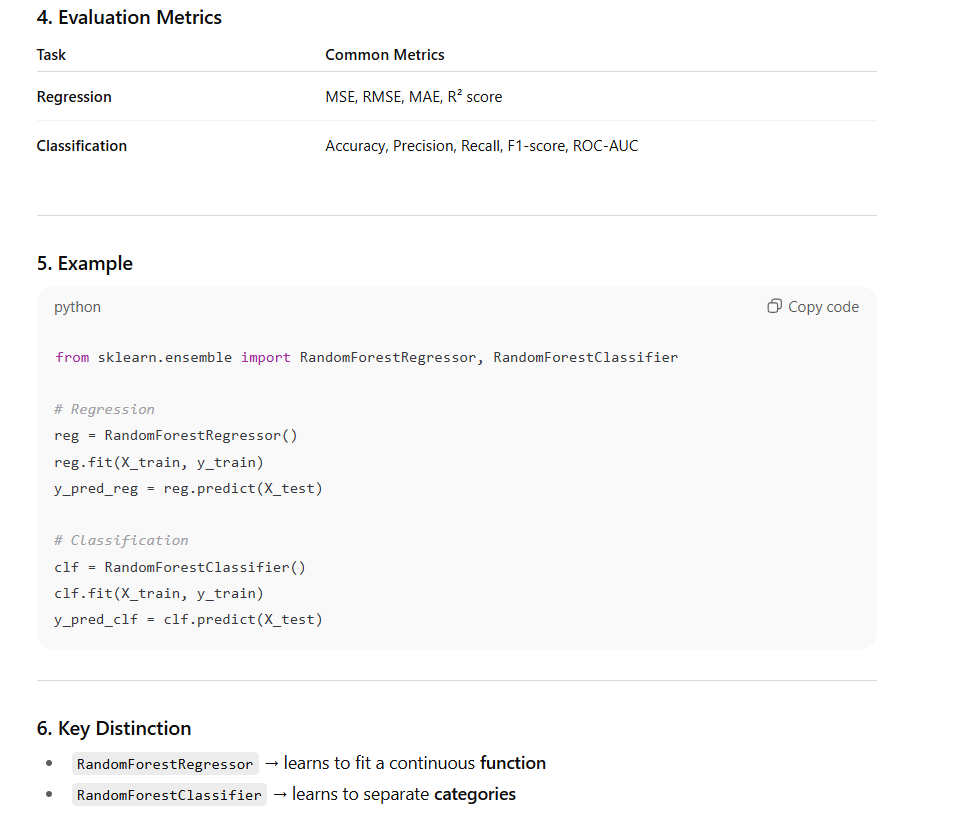

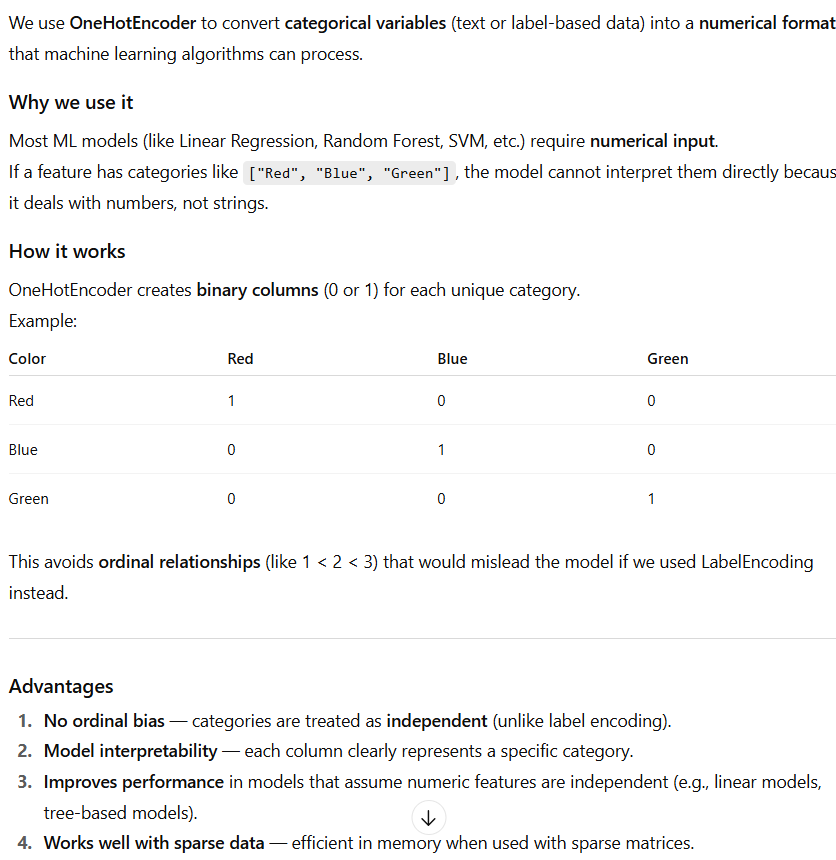
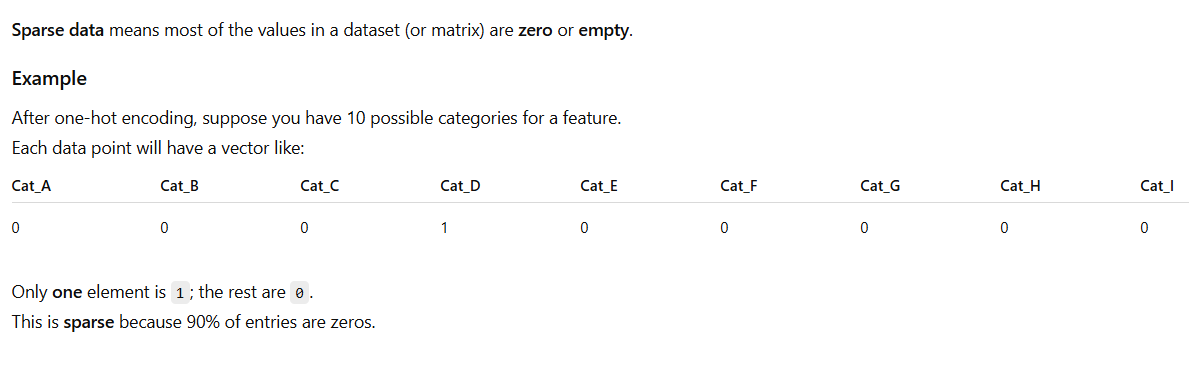
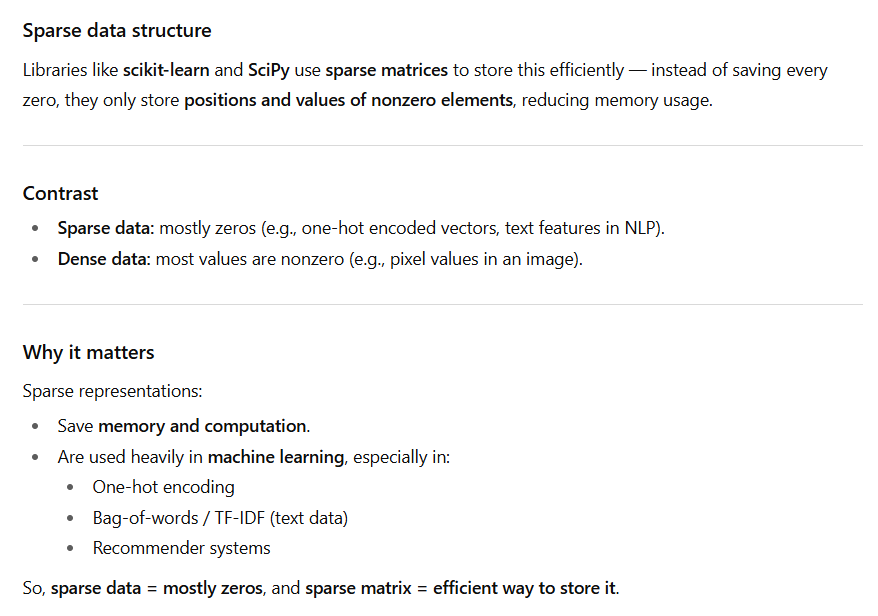

In [36]:
car_sales["Doors"].value_counts()

Doors
4    856
5     79
3     65
Name: count, dtype: int64

In [37]:
# we have to convert non-numeric to numeric

# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"] # the tricky one is doors
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                               remainder = "passthrough") # remains column
# which is not catwgorical_features dont do anything with them

transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]], shape=(1000, 13))

In [38]:
pd.DataFrame(transformed_X)

0    1    2    3    4    5    6    7    8    9    10   11        12
0    0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0   35431.0
1    1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  192714.0
2    0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0   84714.0
3    0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  154365.0
4    0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  181577.0
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...       ...
995  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   35820.0
996  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  155144.0
997  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   66604.0
998  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  215883.0
999  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  248360.0

[1000 rows x 13 columns]

In [39]:
# another way to do it

dummies = pd.get_dummies(car_sales[["Make","Colour","Doors"]])
dummies

Doors  Make_BMW  Make_Honda  Make_Nissan  Make_Toyota  Colour_Black  \
0        4     False        True        False        False         False   
1        5      True       False        False        False         False   
2        4     False        True        False        False         False   
3        4     False       False        False         True         False   
4        3     False       False         True        False         False   
..     ...       ...         ...          ...          ...           ...   
995      4     False       False        False         True          True   
996      3     False       False         True        False         False   
997      4     False       False         True        False         False   
998      4     False        True        False        False         False   
999      4     False       False        False         True         False   

     Colour_Blue  Colour_Green  Colour_Red  Colour_White  
0          False         False       False          True  
1           True         False       False         False  
2          False         False       False          True  
3          False         False       False          True  
4           True         False       False         False  
..           ...           ...         ...           ...  
995        False         False       False         False  
996        False         False       False          True  
997         True         False       False         False  
998        False         False       False          True  
999         True         False       False         False  

[1000 rows x 10 columns]

In [40]:
# Let's refit the model
np.random.seed(42)
X_train,X_test,Y_train,Y_test = train_test_split(transformed_X,
                                                Y,
                                                test_size = 0.2)

model.fit(X_train,Y_train)

RandomForestRegressor()

In [41]:
model.score(X_test,Y_test)

0.3235867221569877

Hey there,

Just a quick update on the next video to keep in mind.

In a newer version of Scikit-Learn (0.23+), the OneHotEncoder class was upgraded to be able to handle None & NaN values.

However, since the video was recorded with an older version of Scikit-Learn, this upgrade isn't shown.

What happens in the video:

You will see an error at 4:30-4:35 which says ValueError: Input contains NaN.

This is expected behaviour for older versions of Scikit-Learn (the version the video was made with).

What might happen with your code:

If you're running Scikit-Learn 0.23+ (you can check by running print(sklearn.__version__) ) no error will appear.

See the update in the documentation under "Attributes" here: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html


What to do:

Even though you see no error, you can keep coding (continue with the video).

But because you see no error, you might not be aware the dataset still has missing values.

That being said, you can continue with the video and follow the steps to fill missing values in the dataset.

---

Thank you to ChiraagKV for pointing this out on Discord.

<h1 style="color:red">lec 110:-Getting Your Data Ready Handling Missing Values With Pandas</h1>

### 1.2 What if there were missing values?

1. Fill them with some value (also known as imputation).
2. Remove the samples with missing data altogether.

In [42]:
# Import car sales missing data
car_sales_missing = pd.read_csv("./teacher-materials/data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

Make Colour  Odometer (KM)  Doors    Price
0   Honda  White        35431.0    4.0  15323.0
1     BMW   Blue       192714.0    5.0  19943.0
2   Honda  White        84714.0    4.0  28343.0
3  Toyota  White       154365.0    4.0  13434.0
4  Nissan   Blue       181577.0    3.0  14043.0

In [43]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [44]:
# create X & Y
X = car_sales_missing.drop("Price",axis=1)
Y = car_sales_missing.Price

In [45]:
# Let's try to convert our data to numbers
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()

transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                               remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4000 stored elements and shape (1000, 16)>

### in some previous version of scikit learn the nan or null values data won't work and give errors so to fix it

## Option 1: Fill missing data with pandas

In [46]:
# Fill the "Make" column
car_sales_missing["Make"].fillna("missing",inplace=True)

# Fill the "Colour" column
car_sales_missing["Colour"].fillna("missing",inplace=True)

# Fill the "Odometer (KM)" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(),inplace=True)

# Fill the "Doors" column (it is tricky) let's use 4 avg of 3 and 5
car_sales_missing["Doors"].fillna(4,inplace=True)

C:\Users\kaush\AppData\Local\Temp\ipykernel_14644\2514635936.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car_sales_missing["Make"].fillna("missing",inplace=True)
C:\Users\kaush\AppData\Local\Temp\ipykernel_14644\2514635936.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


In [47]:
car_sales_missing.fillna({
    "Make":"missing",
    "Colour":"missing",
    "Odometer (KM)": car_sales_missing["Odometer (KM)"].mean(),
    "Doors": 4
}, inplace=True)


In [48]:
# Check our dataframe again
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [49]:
# Remove rows with missing Price value (because we want to predict it)
# and if it is not present then that data isn't  good for us

car_sales_missing.dropna(inplace=True) # only price with na now we can use
# dropna directly

In [50]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [51]:
len(car_sales_missing) # we have lost 50 rows

950

In [52]:
X = car_sales_missing.drop("Price",axis=1)
Y = car_sales_missing.Price

In [53]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()

transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                               remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3800 stored elements and shape (950, 15)>

### Option 2: Fill missing values with Scikit-Learn

<hr>
Once your data is all in numerical format, there's one more transformation you'll probably want to do to it.

It's called Feature Scaling.

In other words, making sure all of your numerical data is on the same scale.

For example, say you were trying to predict the sale price of cars and the number of kilometres on their odometers varies from 6,000 to 345,000 but the median previous repair cost varies from 100 to 1,700. A machine learning algorithm may have trouble finding patterns in these wide-ranging variables.

To fix this, there are two main types of feature scaling.

Normalization (also called min-max scaling) - This rescales all the numerical values to between 0 and 1, with the lowest value being close to 0 and the highest previous value being close to 1. Scikit-Learn provides functionality for this in the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html">MinMaxScalar class.</a>

Standardization - This subtracts the mean value from all of the features (so the resulting features have 0 mean). It then scales the features to unit variance (by dividing the feature by the standard deviation). Scikit-Learn provides functionality for this in the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html">StandardScalar class.<a>

A couple of things to note.

Feature scaling usually isn't required for your target variable.

Feature scaling is usually not required with tree-based models (e.g. Random Forest) since they can handle varying features.

Extra reading

For further information on this topic, I'd suggest the following resources.

<a href="https://rahul-saini.medium.com/feature-scaling-why-it-is-required-8a93df1af310">Feature Scaling - why is it required?<a> by Rahul Saini

<a href="https://benalexkeen.com/feature-scaling-with-scikit-learn/">Feature Scaling with Scikit-Learn<a> by Ben Alex Keen

<a href="https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/">Feature Scaling for Machine Learning: Understanding the Difference Between Normalization vs. Standardization<a> by Aniruddha Bhandari

Challenge

After reading up on feature scaling, a good idea would be to practice it on one of the problems you're working on and see how it affects the results. If you find anything interesting, be sure to share it.

Thank you to Sid and Shubhamai for suggesting resources. If you have anything you think should be added, please let us know.

<hr>
<br>
<hr>
The main takeaways:

Split your data first (into train/test), always keep your training & test data separate

Fill/transform the training set and test sets separately (this goes for filling data with pandas as well)

Don't use data from the future (test set) to fill data from the past (training set)

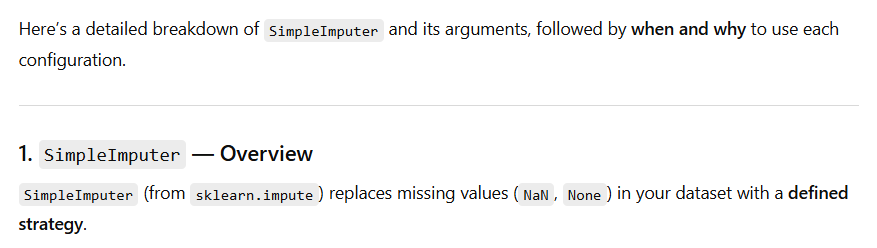
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy="mean", fill_value=None, copy=True, add_indicator=False, keep_empty_features=False)
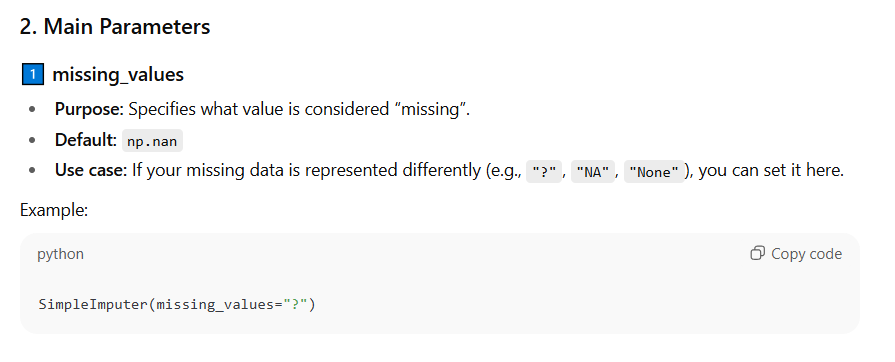
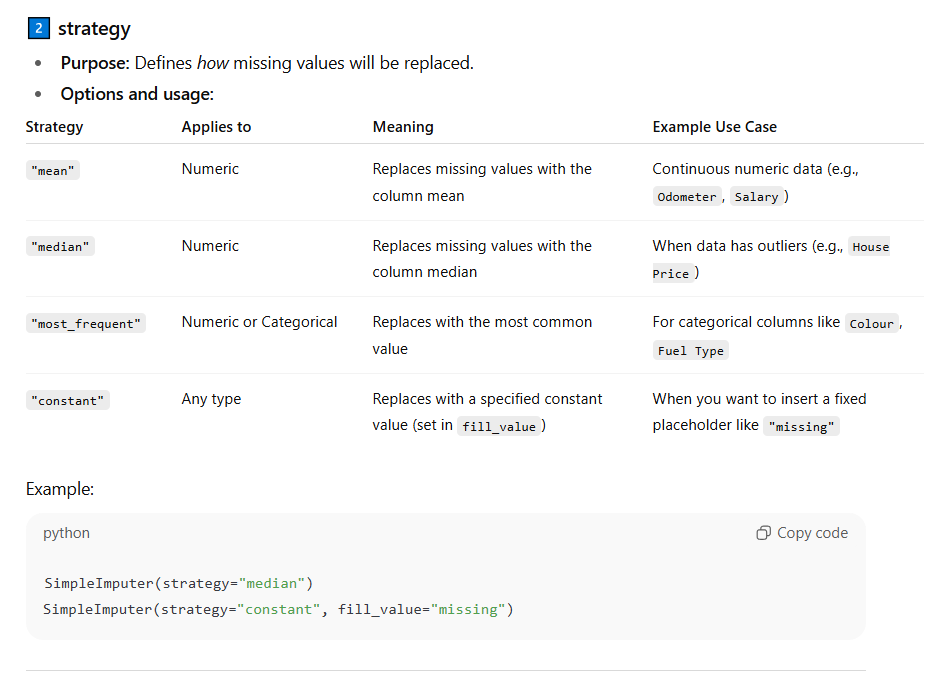
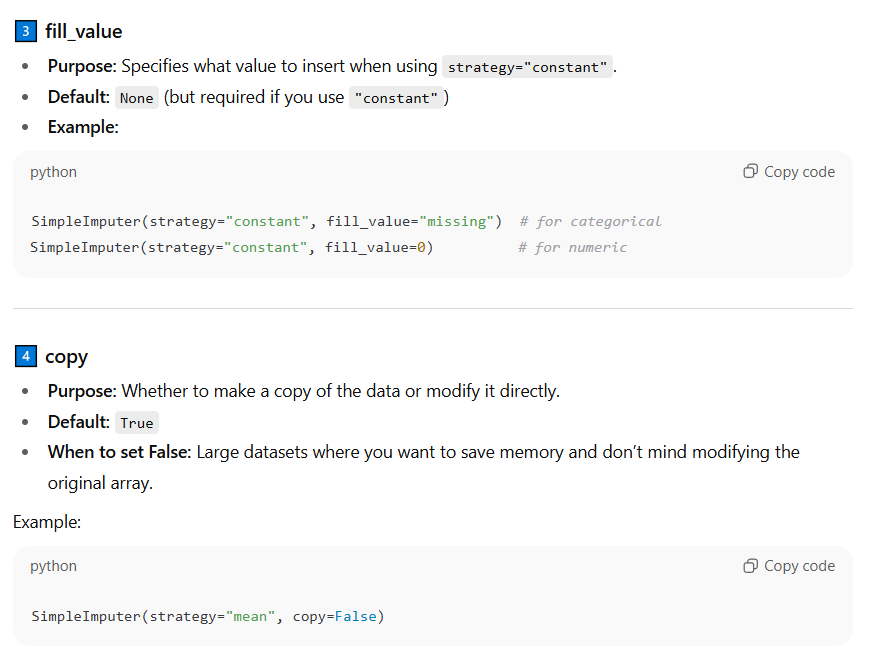
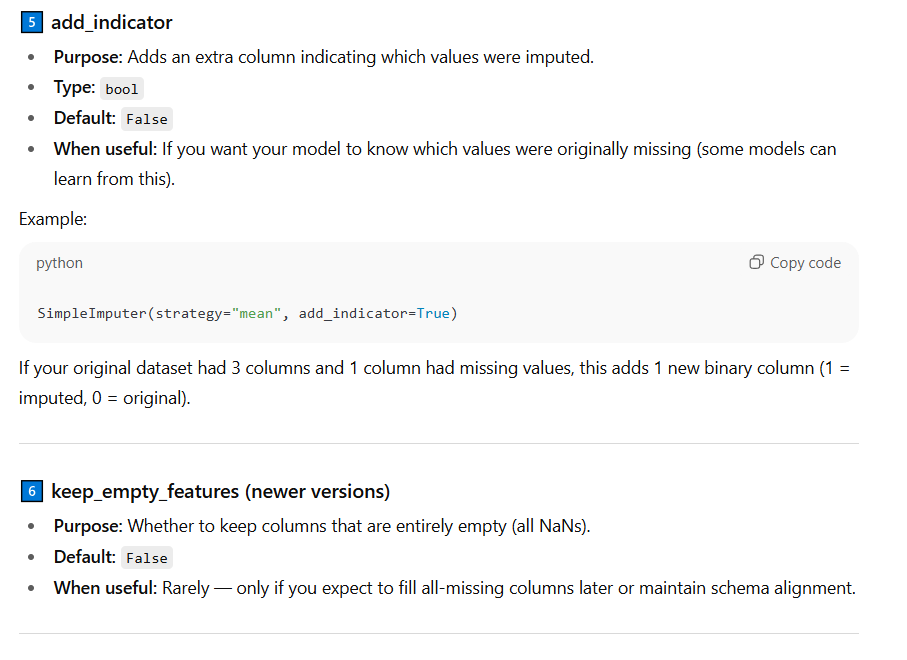
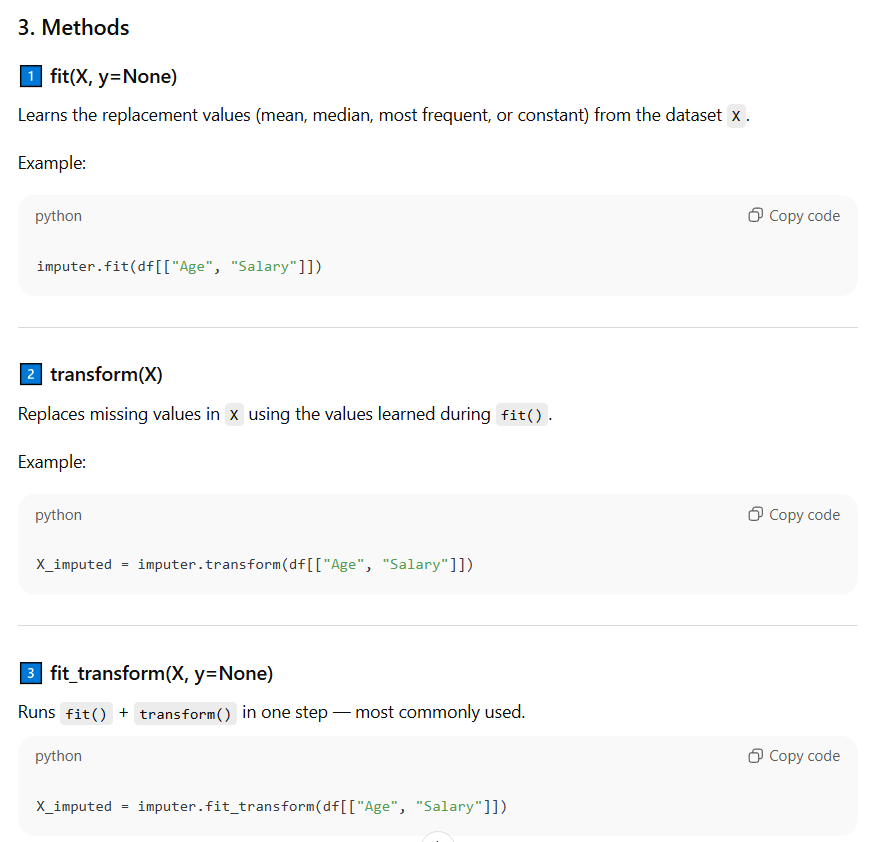
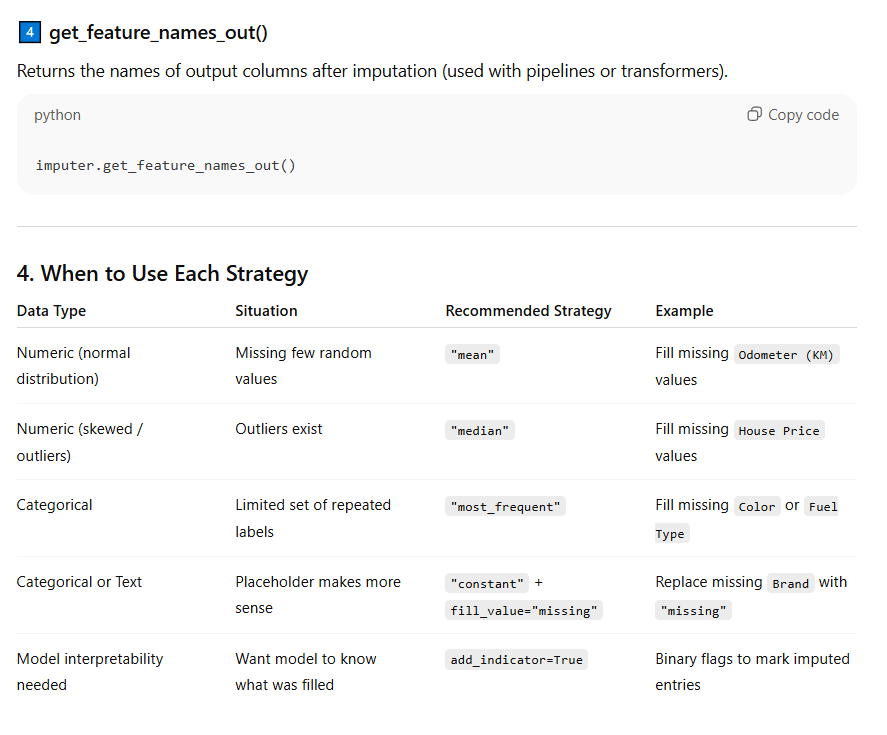


In [54]:
# Example
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np

df = pd.DataFrame({
    "Age": [25, np.nan, 30, 22],
    "Salary": [50000, 54000, np.nan, 49000],
    "City": ["Delhi", np.nan, "Mumbai", "Delhi"]
})

# Numeric
num_imputer = SimpleImputer(strategy="mean")
df[["Age", "Salary"]] = num_imputer.fit_transform(df[["Age", "Salary"]])

# Categorical
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
df[["City"]] = cat_imputer.fit_transform(df[["City"]])

print(df)


         Age   Salary     City
0  25.000000  50000.0    Delhi
1  25.666667  54000.0  missing
2  30.000000  51000.0   Mumbai
3  22.000000  49000.0    Delhi


### ColumnTransformer

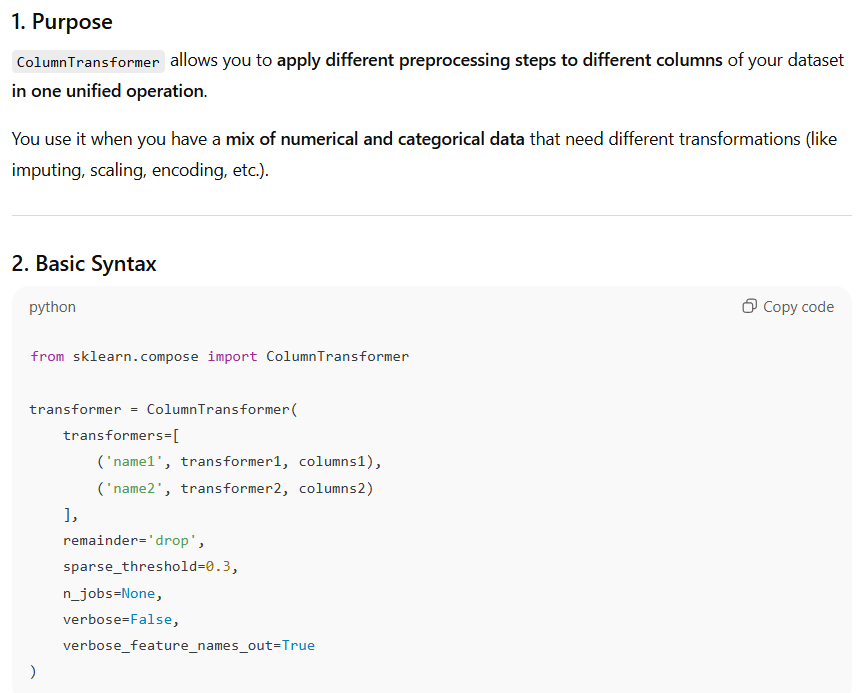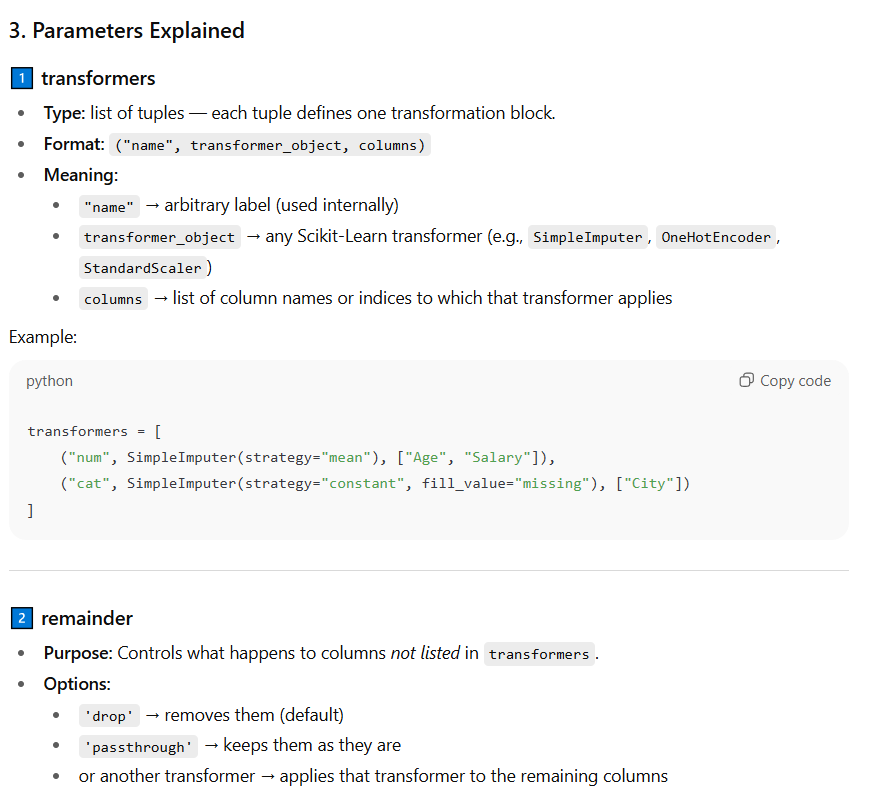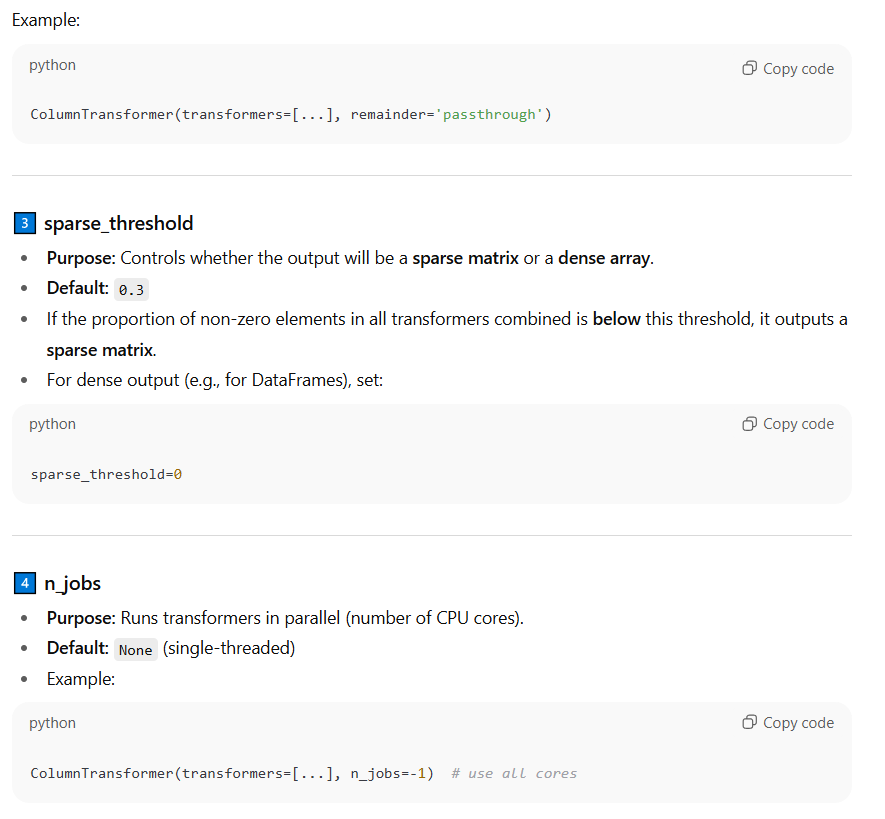
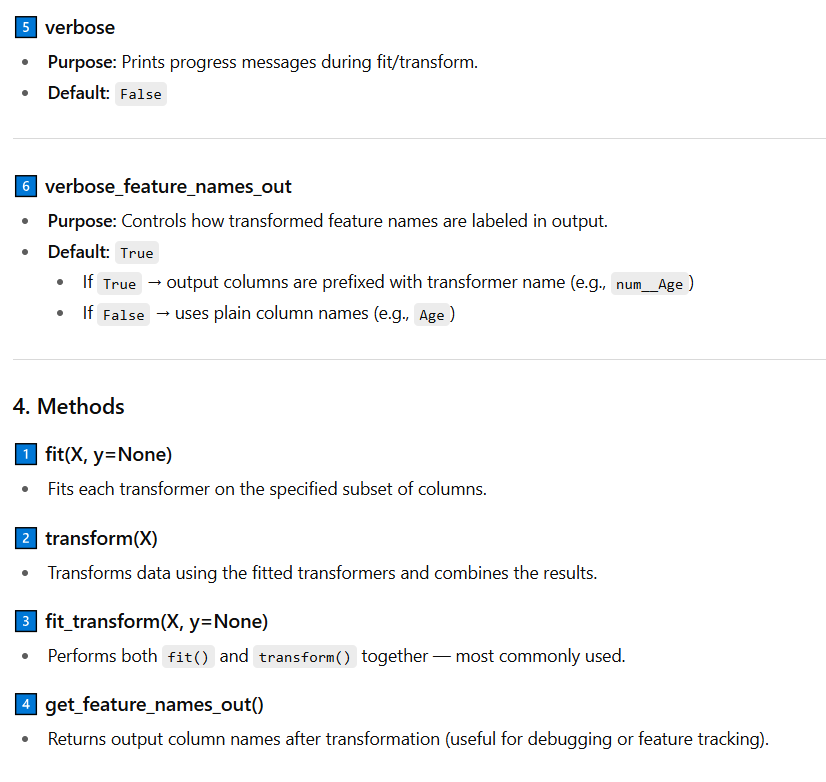
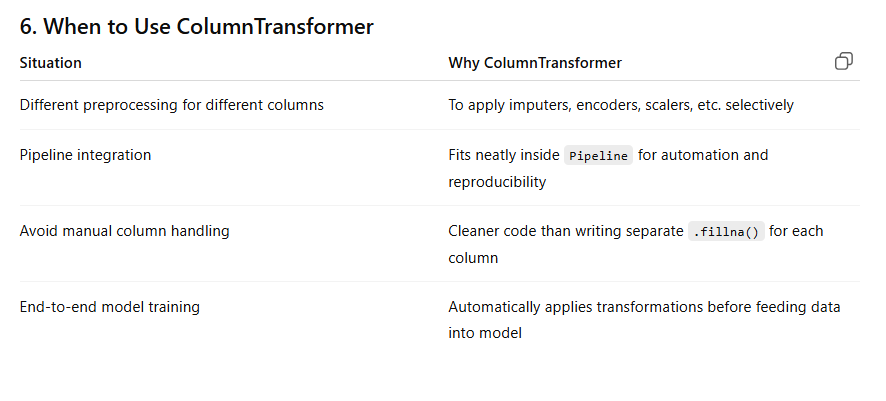

In [55]:
# Example
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import pandas as pd
import numpy as np

df = pd.DataFrame({
    "Make": ["Toyota", "Honda", None, "BMW"],
    "Colour": ["Red", None, "Blue", "Black"],
    "Odometer (KM)": [15000, None, 35000, 40000],
    "Doors": [4, None, 3, None]
})

# Define imputers
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
num_imputer = SimpleImputer(strategy="mean")

# Define column sets
categorical_features = ["Make", "Colour"]
numerical_features = ["Odometer (KM)", "Doors"]

# Combine them in ColumnTransformer
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, categorical_features),
    ("num_imputer", num_imputer, numerical_features)
], remainder='drop')

# Apply transformations
imputed_array = imputer.fit_transform(df)

# Convert back to DataFrame
imputed_df = pd.DataFrame(imputed_array, columns=categorical_features + numerical_features)

print(imputed_df)


     Make Colour Odometer (KM) Doors
0  Toyota    Red       15000.0   4.0
1   Honda   None       30000.0   3.5
2    None   Blue       35000.0   3.0
3     BMW  Black       40000.0   3.5


In [56]:
# Advanced example
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

preprocessor = ColumnTransformer([
    ("num", Pipeline([
        ("imputer", SimpleImputer(strategy="mean")),
        ("scaler", StandardScaler())
    ]), ["Odometer (KM)", "Doors"]),
    
    ("cat", Pipeline([
        ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
        ("encoder", OneHotEncoder(handle_unknown="ignore"))
    ]), ["Make", "Colour"])
], remainder="drop")


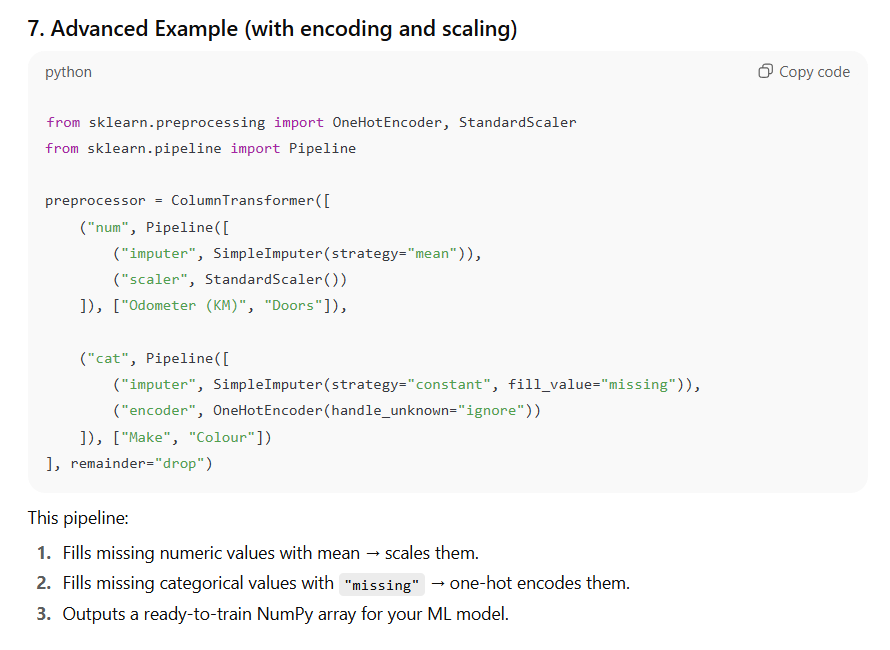

<h1 style="color:red">lec 113:-Getting Your Data Ready Handling Missing Values With Scikitlearn</h1>

In [57]:
car_sales_missing = pd.read_csv("./teacher-materials/data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

Make Colour  Odometer (KM)  Doors    Price
0   Honda  White        35431.0    4.0  15323.0
1     BMW   Blue       192714.0    5.0  19943.0
2   Honda  White        84714.0    4.0  28343.0
3  Toyota  White       154365.0    4.0  13434.0
4  Nissan   Blue       181577.0    3.0  14043.0

In [58]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [59]:
# Drop the rows with no labels
car_sales_missing.dropna(subset=["Price"],inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [60]:
# Split into X & Y
X = car_sales_missing.drop("Price",axis=1)
Y = car_sales_missing.Price

In [61]:
# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer # helps to apply some transformer to column

# Fill categorical values with 'missing' & numerical values with mean
cat_imputer = SimpleImputer(strategy="constant",fill_value="missing")
door_imputer = SimpleImputer(strategy="constant",fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_features =["Make","Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer(
    transformers = [
        ("cat_imputer",cat_imputer,cat_features),
        ("door_imputer",door_imputer,door_feature),
        ("num_imputer",num_imputer,num_features)]
)

# transform the data
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], shape=(950, 4), dtype=object)

In [62]:
car_sales_filled = pd.DataFrame(filled_X,columns=cat_features+door_feature+num_features) # remember it is in order with the tuple we put in columntransformer transformers arguments
car_sales_filled.head()

Make Colour Doors Odometer (KM)
0   Honda  White   4.0       35431.0
1     BMW   Blue   5.0      192714.0
2   Honda  White   4.0       84714.0
3  Toyota  White   4.0      154365.0
4  Nissan   Blue   3.0      181577.0

In [63]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [64]:
# convert our data to number
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer(
    transformers = [("one_hot",one_hot,categorical_features)],
    remainder = "passthrough"
)
transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3800 stored elements and shape (950, 15)>

In [65]:
# Now we've got our data as numbers and filled (no missing values)
# Let's fit a model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(transformed_X,Y,test_size=0.2)
model = RandomForestRegressor(n_estimators=100) # n_estimators = 100 not necessary
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.10486008486143839

In [66]:
# the above is giving worst score maybe because data is less
len(car_sales_filled),len(car_sales)

(950, 1000)

<h1 style="color:red">lec 114:-NEW Choosing The Right Model For Your Data</h1>

Some things to note:

* Sklearn refers to machine learning models/algorithms as estimators.
* Classification problem - predicting a category (heart disease or not)
    * Sometimes you'll see `clf`(short for classifier) used as a classification estimator
* Regression problem - predicting a number (selling price of a car)

<hr>
offline = <a href="./ml_map.svg">Estimator map</a>
online = <a href="https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html">Estimator map</a>

<img src = "./ml_map.svg">

### 2.1 Picking a machine learning model for a regression problem

Let's use california housing dataset from <a href="https://scikit-learn.org/stable/datasets">sklearn datasets <a>.

In [67]:
# Get California Housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing;

In [68]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [69]:
housing_df = pd.DataFrame(housing["data"],columns = housing["feature_names"])
housing_df

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1        -122.22  
2        -122.24  
3        -122.25  
4        -122.25  
...          ...  
20635    -121.09  
20636    -121.21  
20637    -121.22  
20638    -121.32  
20639    -121.24  

[20640 rows x 8 columns]

In [70]:
housing_df["target"] = housing["target"]
housing_df

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  target  
0        -122.23   4.526  
1        -122.22   3.585  
2        -122.24   3.521  
3        -122.25   3.413  
4        -122.25   3.422  
...          ...     ...  
20635    -121.09   0.781  
20636    -121.21   0.771  
20637    -121.22   0.923  
20638    -121.32   0.847  
20639    -121.24   0.894  

[20640 rows x 9 columns]

In [71]:
#housing_df=housing_df.drop("MedHouseVal",axis=1)

In [72]:
housing_df

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  target  
0        -122.23   4.526  
1        -122.22   3.585  
2        -122.24   3.521  
3        -122.25   3.413  
4        -122.25   3.422  
...          ...     ...  
20635    -121.09   0.781  
20636    -121.21   0.771  
20637    -121.22   0.923  
20638    -121.32   0.847  
20639    -121.24   0.894  

[20640 rows x 9 columns]

In [73]:
# Import algorithm
from sklearn.linear_model import Ridge # selection of model by that estimator map
# and trying all of them one by one

# Setup random seed
np.random.seed(42)

# Create the data
X = housing_df.drop("target",axis=1)
y = housing_df.target # median house price in $100,00s

# Split into train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Instantiate and fit the model (on the training set)
model = Ridge()
model.fit(X_train,y_train)

# Check the score of the model (on the test set)
model.score(X_test,y_test) # default regression evaluation matrix for 
# regression model in sklearn is R^2

0.5758549611440126

<h1 style="color:red">lec 115:-NEW Choosing The Right Model For Your Data 2 Regression</h1>

What if `Ridge` didn't work or the score didn't fit our needs?

Well, we could always try a different model...

How about we try an ensemble model (an ensemble is combination of smaller model to try and make a better prediction than just a single model)?

Sklearn's ensemble model can be found here <a href="https://scikit-learn.org/stable/modules/ensemble.html">Ensemble model<a>

In [74]:
# Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
X = housing_df.drop("target",axis=1)
y = housing_df["target"]

# Split into train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Create random forest model
model = RandomForestRegressor()
model.fit(X_train,y_train)

# Check the score of the model (on the test set)
model.score(X_test,y_test)

0.8065734772187598

## 2.2 Picking a machine learning model for a classification problem

In [75]:
heart_disease = pd.read_csv("./teacher-materials/data/heart-disease.csv")
heart_disease.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [76]:
len(heart_disease)

303

consulting the map and it says to try `LinearSVC`

In [77]:
# Import the LinearSVC estimator class
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target",axis=1)
y=heart_disease["target"]

# Split the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Instantiate LinearSVC
clf = LinearSVC(max_iter=10000)
clf.fit(X_train,y_train)

# Evaluate the LinearSVC
clf.score(X_test,y_test)

0.8688524590163934

In [78]:
heart_disease["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [79]:
# Import the RandomForestClassifier model class from the ensemble module
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Create the data
X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Create random forest model
model = RandomForestClassifier()
model.fit(X_train,y_train)

# Check the score of the model (on the test set)
model.score(X_test,y_test)

0.8524590163934426

Tidbit:

    1. If you have structured data(stuff in tables etc), use ensemble methods
    2. If you have unstructured data(like images etc), use deep learning or transfer learning

In [80]:
heart_disease # it is a structured data

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

<h1 style="color:red">lec 119:-Fitting A Model To The Data</h1>

## 3. Fit the model/algorithm and use it to make prediction on our data

### 3.1 Fitting the model to the data

Different names for:
* `X` => features, features variables, data
* `y` => labels, targets, targets variables

In [81]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target",axis=1)
y = heart_disease.target

# Split the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Instantiate Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100)

# Fit the model to data (training the machine learning model)
clf.fit(X_train,y_train)

# Evaluate the Random Forest Classifier (use the patterns the model has learned)
clf.score(X_test,y_test)

0.8524590163934426

<h1 style="color:red">lec 120:-Make Predictions With Our Model</h1>

### 3.2 Make predictions using a machine learning model

2 ways to make predictions:
1. `predict()`
2. `predict_proba()`

In [82]:
# Use a trained model to make predictions
clf.predict(np.array([1,2,4,8,5,3])) # this does not work because 
# you have to give same  data as X_train (no. of columns)

C:\users\kaush\desktop\ml_course\sample_project\env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[1. 2. 4. 8. 5. 3.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
X_test.shape

In [ ]:
X_test.head()

In [ ]:
clf.predict(X_test) # predictions

In [87]:
np.array(y_test) # truth labels

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [88]:
# Compare predictions to truth labels to evaluate the model
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

np.float64(0.8524590163934426)

In [89]:
clf.score(X_test,y_test) # same as above

0.8524590163934426

In [90]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.8524590163934426

<h1 style="color:red">lec 121:-predict vs predict_proba</h1>

In [91]:
# predict_proba() returns probabilities of a classification label(probability estimates)
clf.predict_proba(X_test[:5]) 

# array is like this label 0 probability then label 1 probability

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [ ]:
0.89+0.11,0.49+0.51

In [92]:
# Let's predict() on the same data...
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1])

In [93]:
heart_disease["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [94]:
# we use predict_proba() where we want to check the confidence of our model


<h1 style="color:red">lec 122:-NEW Making Predictions With Our Model Regression</h1>

`predict()` can also be used for regression models.

In [95]:
housing_df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422

In [96]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
X = housing_df.drop("target",axis=1)
y = housing_df["target"]

# Split into training and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Create model instance
model = RandomForestRegressor(n_estimators=100)

# Fit the model to the data
model.fit(X_train,y_train)

# Make predictions 
y_preds = model.predict(X_test)

In [97]:
y_preds[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  , 1.6525301,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [98]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [99]:
len(y_test),len(y_preds)

(4128, 4128)

### look at regression evaluation matrix

In [100]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.32659871732073664

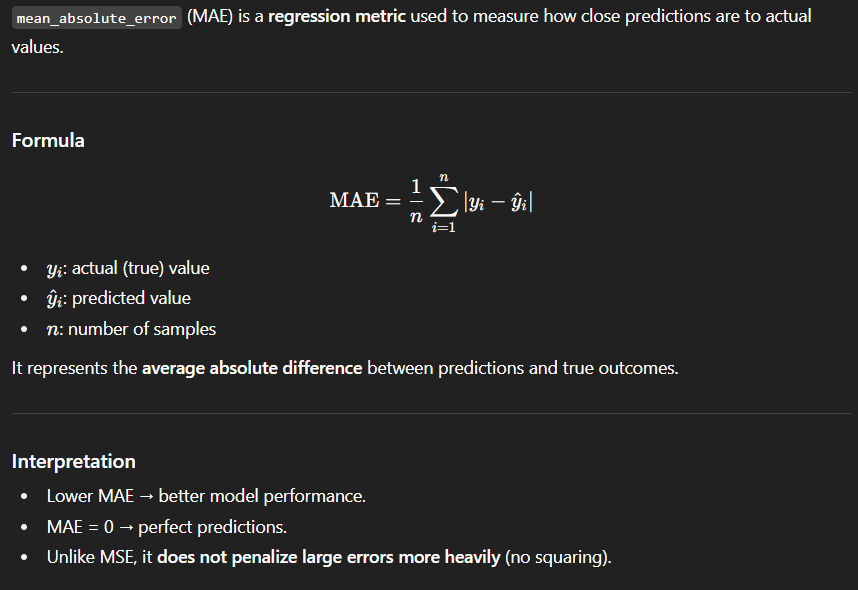
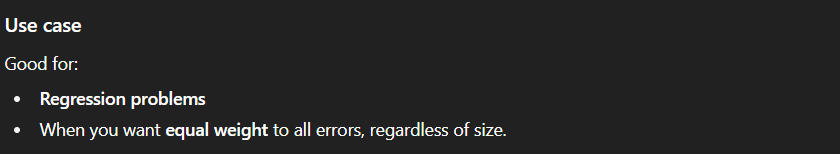

In [101]:
from sklearn.metrics import mean_absolute_error

y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]

mae = mean_absolute_error(y_true, y_pred)
print(mae)


0.5


<h1 style="color:red">lec 123:-NEW Evaluating A Machine Learning Model Score Part 1</h1>

## 4. Evaluating a machine learning model

Three ways to evaluate Scikit-Learn models/estimators:

    1. Estimator's built-in `score()` method
    2. The `scoring` parameter
    3. Problem-specific metric functions

https://scikit-learn.org/stable/model_selection.html

you can read more about these here: https://scikit-learn.org/stable/modules/model_evaluation.html

# 4.1 Evaluating a model with `score` method

In [102]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create X & y
X = heart_disease.drop("target",axis=1)
y = heart_disease.target

# Create train/test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Create classifier model instance
clf = RandomForestClassifier(n_estimators=1000)

# Fit classifier to training data
clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [103]:
# the highest value for the .score() method is 1.0, the lowest is 0.0
clf.score(X_train,y_train) # score is less than 1 if estimators are less

1.0

In [104]:
clf.score(X_test,y_test)

0.8688524590163934

<h1 style="color:red">lec 124:-NEW Evaluating A Machine Learning Model Score Part 2</h1>

Let's use the `score()` on our regression problem...

In [105]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create X & y
X = housing_df.drop("target",axis=1)
y = housing_df.target

# Create train/test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Create classifier model instance
model = RandomForestRegressor(n_estimators=100)

# Fit classifier to training data
model.fit(X_train,y_train)

RandomForestRegressor()

In [106]:
model.score(X_test,y_test) # n_estimators = 2

0.8065734772187598

In [107]:
# the default score() evaluation metric is r_squared for regression algorithms
# Highest = 1.0 ,lowest = 0.0
model.score(X_test,y_test) # n_estimators = 100
# improvement  
# target is dependent variable in R^2 matrix coefficient of prediction

0.8065734772187598

<h1 style="color:red">lec 125:-Evaluating A Machine Learning Model 2 Cross Validation</h1>

### 4.2 Evaluating a model using the `scoring` parameter

In [108]:
from sklearn.model_selection import cross_val_score


# classification code
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create X & y
X = heart_disease.drop("target",axis=1)
y = heart_disease.target

# Create train/test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Create classifier model instance
clf = RandomForestClassifier(n_estimators=100)

# Fit classifier to training data
clf.fit(X_train,y_train)

RandomForestClassifier()

In [109]:
clf.score(X_test,y_test)

0.8524590163934426

In [110]:
cross_val_score(clf,X,y,cv=5) # it takes classifier direct X & y not train/test

# cv = 5 means train-test split 5 times different-different versions

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

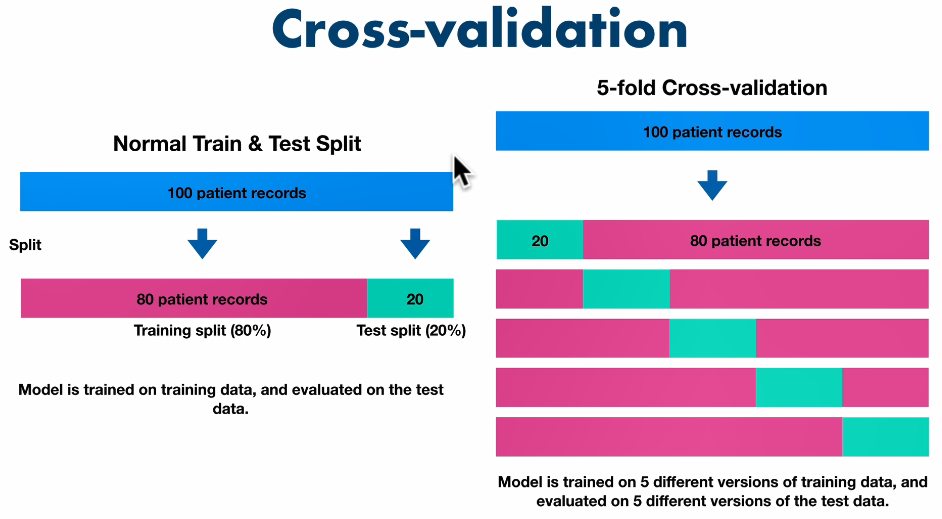

In [111]:
cross_val_score(clf,X,y,cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [112]:
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(X_test,y_test)

# Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf,X,y,cv=5))

# Compare the two
clf_single_score , clf_cross_val_score # even though cross_val_score is low
# but always prefer cross_val_score because it avoids getting lucky score in a single split

(0.8524590163934426, np.float64(0.8248087431693989))

In [113]:
# Scoring parameter set to None by default
cross_val_score(clf,X,y,cv=5,scoring=None) # if scoring is none then it
# use default scoring paramtere of a estimator in our case it is
# classifier = mean accuracy

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

<h1 style="color:red">lec 126:-Evaluating A Classification Model 1 Accuracy</h1>

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report


# 1.Accuracy:-

In [114]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target",axis=1)
y = heart_disease.target

clf = RandomForestClassifier(n_estimators=100)
cross_val_score =cross_val_score(clf,X,y,cv=5)

In [115]:
np.mean(cross_val_score)

np.float64(0.8248087431693989)

In [116]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score)*100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 82.48%


<h1 style="color:red">lec 127:-Evaluating A Classification Model 2 ROC Curve</h1>

# 2.Area under ROC curve:-

**Area under the receiver operating characteristic curve (AUC/ROC)**

* Area under curve(AUC)
* ROC curve

ROC curves are a comparison of a model's true positive rate (tpr) versus a models false positive rate (fpr).

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when turth is 0
* False negative = model predicts 0 when truth is 1

In [117]:
# Create X_test... etc
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [118]:
from sklearn.metrics import roc_curve

# Fit the classifier
clf.fit(X_train,y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10]  # 0 is negative class 1 is positive class

array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.97, 0.03],
       [0.15, 0.85],
       [0.4 , 0.6 ]])

In [119]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [120]:
# Calculate fpr,tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test,y_probs_positive)

# check the false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

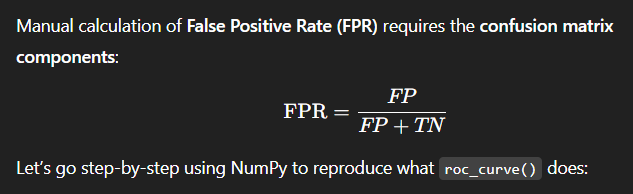

In [121]:
# Get model probabilities and thressholds
import numpy as np

# example: probabilities for the positive class
y_probs_positive1 = np.array([0.9, 0.8, 0.7, 0.4, 0.3, 0.1])
# true labels
y_test1 = np.array([1, 1, 0, 1, 0, 0])

# sort by descending probability (remember first is infinity last is 0 and all entries are unique in threshold)
thresholds1 = np.r_[np.inf, np.sort(np.unique(y_probs_positive1))[::-1]] # np.r[] used for concatenation

# Compute FPR, TPR manually for each thresshold
fpr_list1 = []
tpr_list1 = []

for thresh in thresholds1:
    # predicted class at current threshold
    y_pred1 = (y_probs_positive1 >= thresh).astype(int)
    
    # confusion matrix components
    TP = np.sum((y_test1 == 1) & (y_pred1 == 1))
    FP = np.sum((y_test1 == 0) & (y_pred1 == 1))
    TN = np.sum((y_test1 == 0) & (y_pred1 == 0))
    FN = np.sum((y_test1 == 1) & (y_pred1 == 0))
    
    # rates
    fpr = FP / (FP + TN) if (FP + TN) > 0 else 0
    tpr = TP / (TP + FN) if (TP + FN) > 0 else 0
    
    fpr_list1.append(fpr)
    tpr_list1.append(tpr)

# Convert to arrays
fpr1 = np.array(fpr_list1)
tpr1 = np.array(tpr_list1)


# Inspect the results
import pandas as pd

pd.DataFrame({
    'Threshold': thresholds1,
    'FPR': fpr1,
    'TPR': tpr1
})


Threshold       FPR       TPR
0        inf  0.000000  0.000000
1        0.9  0.000000  0.333333
2        0.8  0.000000  0.666667
3        0.7  0.333333  0.666667
4        0.4  0.333333  1.000000
5        0.3  0.666667  1.000000
6        0.1  1.000000  1.000000

In [122]:
# the above data frame will match with this
from sklearn.metrics import roc_curve
fpr1,tpr1,thresholds1=roc_curve(y_test1, y_probs_positive1)
pd.DataFrame({
    'Threshold': thresholds1,
    'FPR': fpr1,
    'TPR': tpr1
})

Threshold       FPR       TPR
0        inf  0.000000  0.000000
1        0.9  0.000000  0.333333
2        0.8  0.000000  0.666667
3        0.7  0.333333  0.666667
4        0.4  0.333333  1.000000
5        0.1  1.000000  1.000000

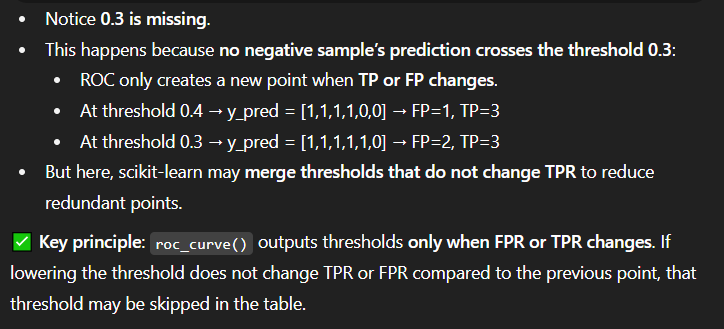

<h1 style="color:red">lec 128:-Evaluating A Classification Model 3 ROC Curve</h1>

In [123]:
# Calculate fpr,tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test,y_probs_positive)

# check the false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

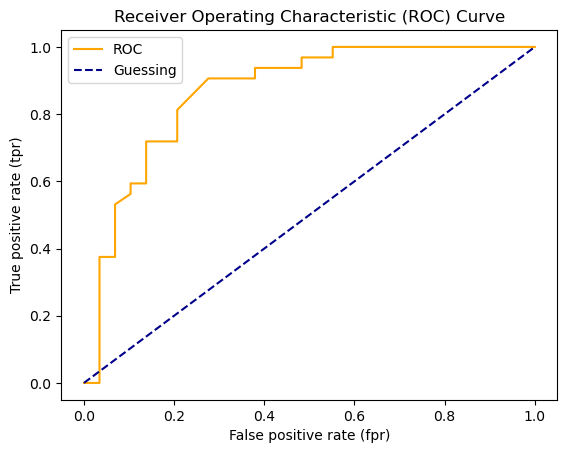

In [124]:
# Create a function for plotting ROC curves

import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
    """
    Plots a ROC curve given the fpr & tpr
    """
    # Plot roc curve
    plt.plot(fpr,tpr,color="orange",label="ROC")
    # Plot line with no predictive power (baseline)
    plt.plot([0,1],[0,1],color = "darkblue",linestyle="--",label="Guessing")

    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr,tpr)

In [125]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_probs_positive) # it gives area under the roc curve
# maximum score we can get is 1 

0.8669181034482759

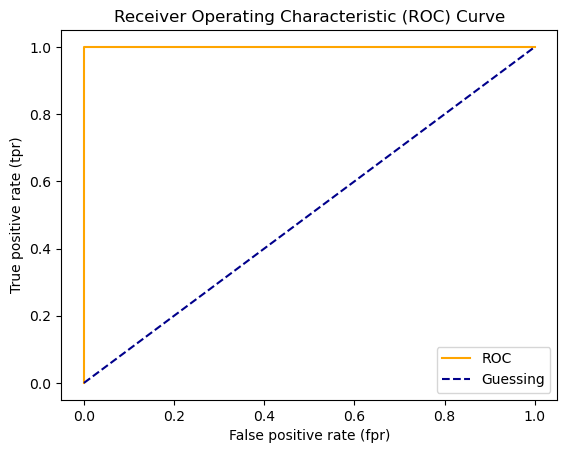

In [126]:
# Plot perfect ROC curve and AUC score
fpr,tpr,thressholds = roc_curve(y_test,y_test)
plot_roc_curve(fpr,tpr)

In [127]:
fpr

array([0., 0., 1.])

In [128]:
tpr

array([0., 1., 1.])

In [129]:
roc_auc_score(y_test,y_test)

1.0

When you first encounter them, ROC Curve and AUC (area under curve) metrics can be a little confusing. But not to worry, with a little practice, they'll start to make sense.

In a nutshell, what you should remember is:

* ROC curves and AUC metrics are evaluation metrics for binary classification models (a model which predicts one thing or another, such as heart disease or not).

* The ROC curve compares the true positive rate (tpr) versus the false positive rate (fpr) at different classification thresholds.

* The AUC metric tells you how well your model is at choosing between classes (for example, how well it is at deciding whether someone has heart disease or not). A perfect model will get an AUC score of 1.

For more information on these metrics, bookmark the following resources and refer to them when you need:

* <a href="https://www.youtube.com/watch?v=4jRBRDbJemM">ROC and AUC, Clearly Explained!<a> by StatQuest

* <a href="https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html">ROC documentation in Scikit-Learn<a> (contains code examples)

* <a href="https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc">How the ROC curve and AUC are calculated<a> by Google's Machine Learning team

<h1 style="color:red">lec 130:-Evaluating A Classification Model 4 Confusion Matrix</h1>

**Confusion Matrix**

A confusion matrix is a quick way to compare the labels a model predicts and the actual label it was supposed to predict.

In essence, giving you an idea of where the model is getting confused.

In [130]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test,y_preds)

array([[23,  6],
       [ 6, 26]])

In [131]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,
            y_preds,
           rownames=["Actual Labels"],
           colnames=["Predicted Labels"])

Predicted Labels   0   1
Actual Labels           
0                 23   6
1                  6  26

In [132]:
"""
24-> True  negatives
5 -> False positives
4 -> False negatives
28-> True  positives
"""
24+5+4+28 # no. of datasets in y_test or y_preds

61

In [133]:
len(X_test)

61

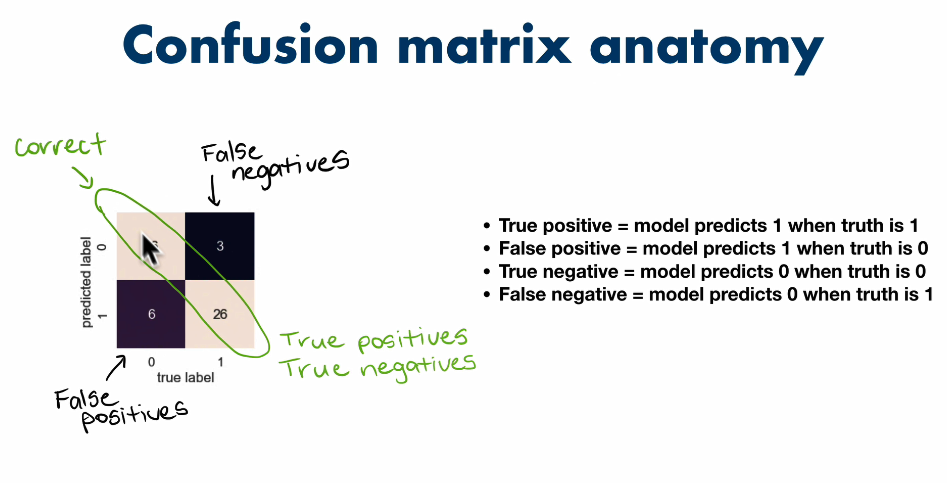

In [134]:
# how to install conda package into the conda environment inside the notebook
# {sys.prefix} IT is path name where we are currently

import sys
!conda install --yes --prefix {sys.prefix} seaborn

Jupyter detected...
3 channel Terms of Service accepted
Channels:
 - conda-forge
 - defaults
Platform: win-64
Solving environment: done

# All requested packages already installed.





==> WARNING: A newer version of conda exists. <==
    current version: 25.7.0
    latest version: 25.9.1

Please update conda by running

    $ conda update -n base -c defaults conda


C:\users\kaush\desktop\ml_course\sample_project\env\Lib\site-packages\IPython\utils\_process_win32.py:138: ResourceWarning: unclosed file <_io.BufferedWriter name=4>
  res = process_handler(cmd, _system_body)
C:\users\kaush\desktop\ml_course\sample_project\env\Lib\site-packages\IPython\utils\_process_win32.py:138: ResourceWarning: unclosed file <_io.BufferedReader name=5>
  res = process_handler(cmd, _system_body)
C:\users\kaush\desktop\ml_course\sample_project\env\Lib\site-packages\IPython\utils\_process_win32.py:138: ResourceWarning: unclosed file <_io.BufferedReader name=6>
  res = process_handler(cmd, _system_body)


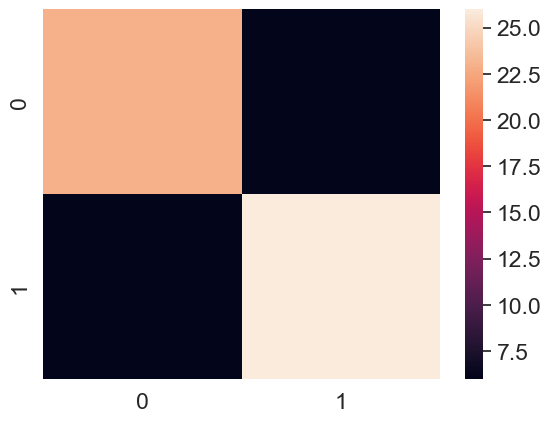

In [135]:
# Make our confusion matrix more visual with Seaborn's heatmap()
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test,y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat);

<h1 style="color:red">lec 131:-NEW Evaluating A Classification Model 5 Confusion Matrix</h1>

### Creating a confusion matrix using Scikit-learn

To use the new method of creating a confusion matrix with Scikit-Learn you will need sklearn version 1.0+

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [136]:
import sklearn
sklearn.__version__

'1.7.2'

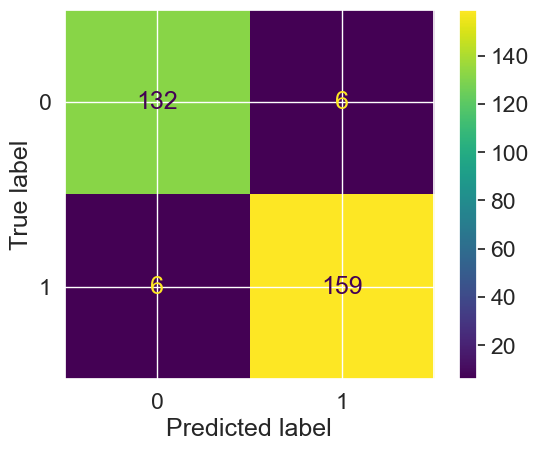

In [137]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf,X=X,y=y)

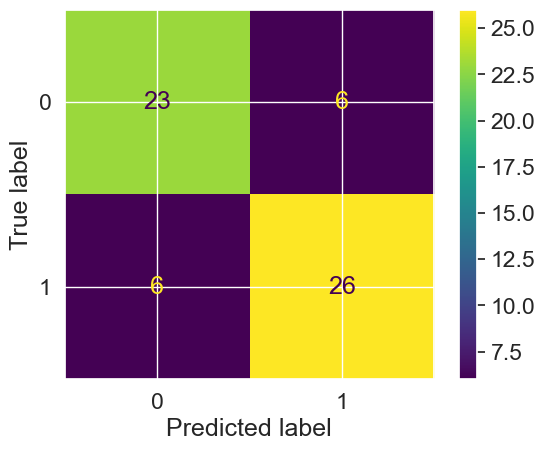

In [138]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test,y_pred=y_preds)

<h1 style="color:red">lec 132:-Evaluating A Classification Model 6 Classification Report</h1>

**Classification Report**

In [150]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



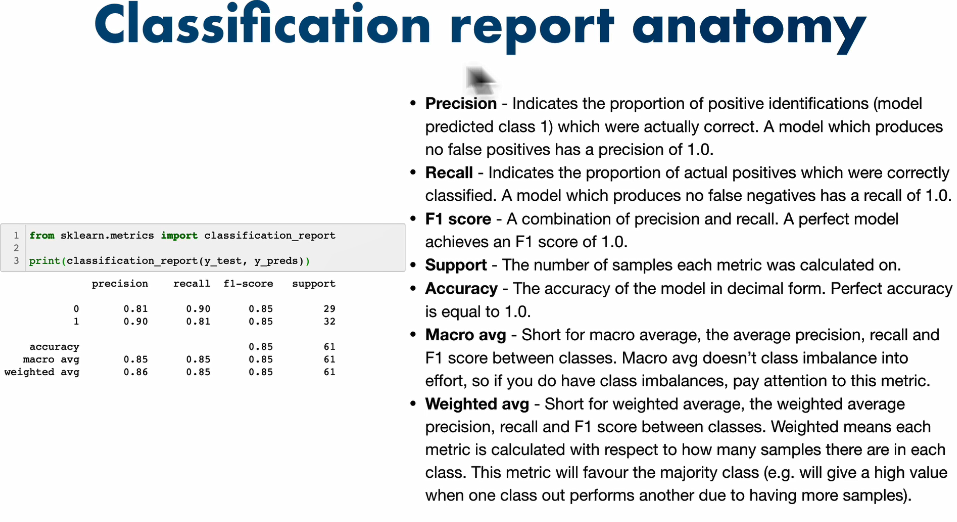

In [139]:
# Where precision and recall became valuable
disease_true = np.zeros(10000)
disease_true[0]=1 # only one positive case

disease_preds = np.zeros(10000) # model predicts every class as 0

pd.DataFrame(classification_report(disease_true,
                                  disease_preds,
                                  output_dict=True))

C:\users\kaush\desktop\ml_course\sample_project\env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\users\kaush\desktop\ml_course\sample_project\env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\users\kaush\desktop\ml_course\sample_project\env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mod

0.0  1.0  accuracy     macro avg  weighted avg
precision     0.99990  0.0    0.9999      0.499950       0.99980
recall        1.00000  0.0    0.9999      0.500000       0.99990
f1-score      0.99995  0.0    0.9999      0.499975       0.99985
support    9999.00000  1.0    0.9999  10000.000000   10000.00000

# Model evaluation classification

https://scikit-learn.org/0.16/modules/model_evaluation.html

<h1 style="color:red">lec 133:-NEW Evaluating A Regression Model 1 R2 Score</h1>

### 4.2.2 Regression model evaluation metrics

<a href="https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics">Model evaluation metrics(Regression) documentation<a>

The one we're going to cover are:
1. R^2 (pronounced r-squared) pr coefficient of determination
2. Mean absolute error (MAE)
3. Mean squared error (MSE)


## R^2

What R-squared does: Compares your models prediction to the mean of targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of targets, it's R^2 value would be 0. And if your model prefectly preficts a range of numbers it's R^2 value would be 1.

In [140]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target",axis=1)
y = housing_df.target

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train,y_train)

model.score(X_test,y_test)

0.8065734772187598

In [141]:
housing_df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422

In [142]:
y_test.mean()

np.float64(2.0550030959302323)

In [143]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test),y_test.mean())

In [144]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [145]:
r2_score(y_true=y_test,
        y_pred=y_test_mean)

# if model predicts only mean then r2_score is going to be 0.0 

0.0

In [146]:
r2_score(y_true=y_test,
        y_pred=y_test)

# perfect r2_score is 1.0

1.0

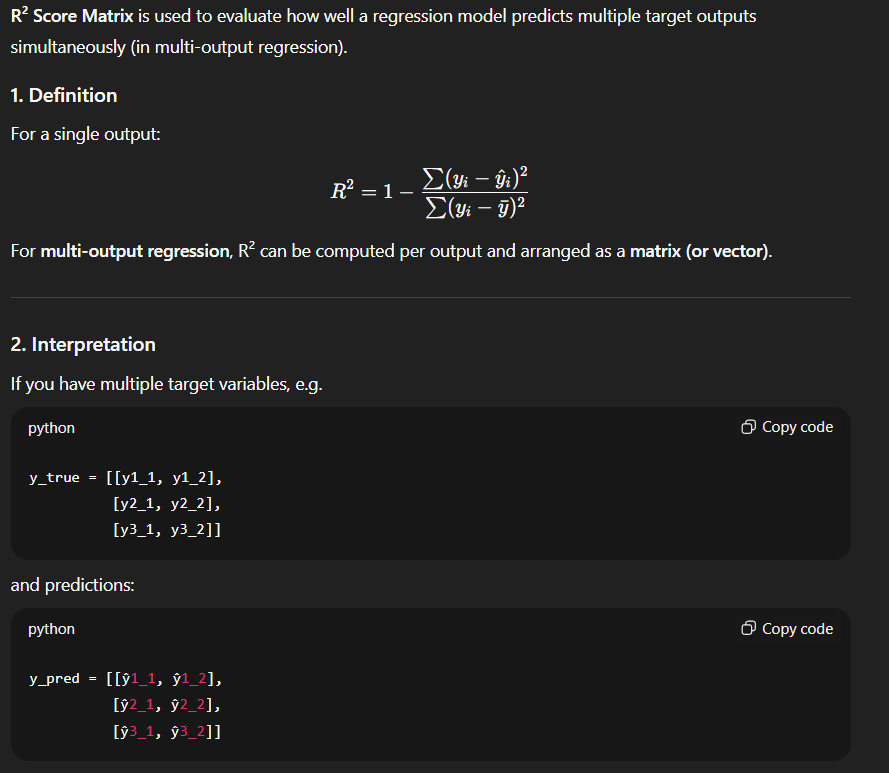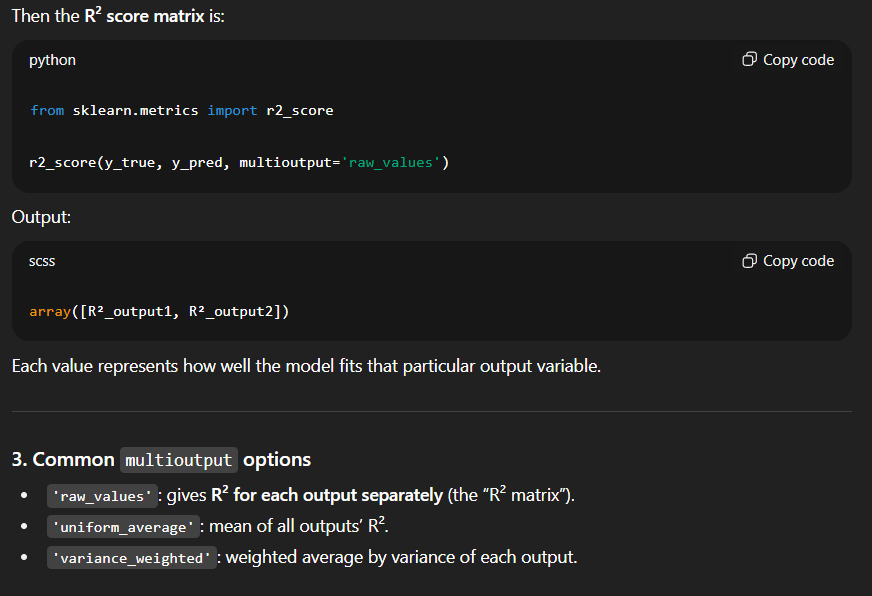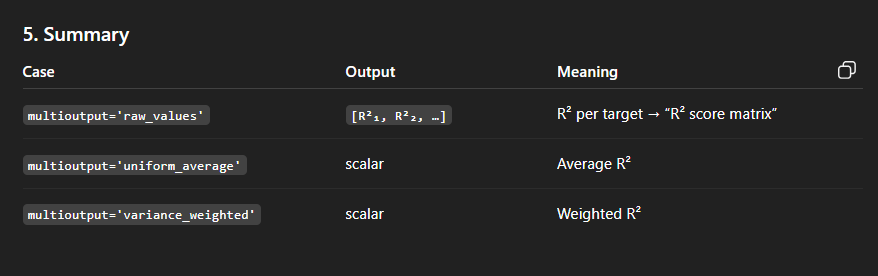

In [147]:
import numpy as np
from sklearn.metrics import r2_score

y_true = np.array([[3, -0.5, 2], [7, 4, 5]])
y_pred = np.array([[2.5, 0.0, 2], [8, 5, 5]])

r2_matrix = r2_score(y_true, y_pred, multioutput='raw_values')
print(r2_matrix)


[0.84375    0.87654321 1.        ]


<h1 style="color:red">lec 134:-NEW Evaluating A Regression Model 2 MAE</h1>

**Mean absolute error (MAE)**

MAE is the average of the absolute differences between predictions and actual values.

It gives you an idea of how wrong your model predictions are.

In [148]:
# MAE
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test,y_preds)
mae

0.32659871732073664

In [149]:
df = pd.DataFrame(data={"actual values":y_test,
                       "predict values":y_preds})

df["differences"] = abs(df["predict values"] - df["actual values"])
df.head(10)

actual values  predict values  differences
20046        0.47700        0.493840     0.016840
3024         0.45800        0.754940     0.296940
15663        5.00001        4.928596     0.071414
20484        2.18600        2.543160     0.357160
9814         2.78000        2.331760     0.448240
13311        1.58700        1.652530     0.065530
7113         1.98200        2.343230     0.361230
7668         1.57500        1.661820     0.086820
18246        3.40000        2.474890     0.925110
5723         4.46600        4.834478     0.368478

In [150]:
df["differences"].mean() # same as MAE also  it's MAE

np.float64(0.32659871732073664)

In [151]:
np.abs(df["differences"]).mean() # np.abs() made all the numbers inside positive

np.float64(0.32659871732073664)

<h1 style="color:red">lec 135:-NEW Evaluating A Regression Model 3 MSE</h1>

**Mean Squared Error(MSE)**

MSE is the mean of the square of the errors between actual and predicted values

it is going to amplify the values which have large errors.

In [152]:
# Mean squared error
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test,y_preds)
mse

0.2534678520824551

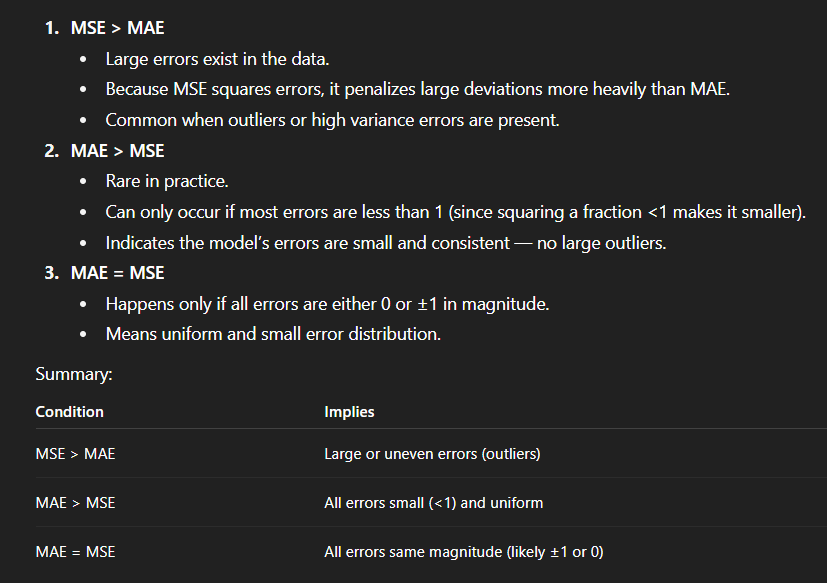

In [153]:
df["squared_differences"]=np.square(df["differences"])
df.head()

actual values  predict values  differences  squared_differences
20046        0.47700        0.493840     0.016840             0.000284
3024         0.45800        0.754940     0.296940             0.088173
15663        5.00001        4.928596     0.071414             0.005100
20484        2.18600        2.543160     0.357160             0.127563
9814         2.78000        2.331760     0.448240             0.200919

In [154]:
# Calculate MSE by hand
squared = np.square(df["differences"])
squared.mean()

np.float64(0.2534678520824551)

In [155]:
df.iloc[0]

actual values          0.477000
predict values         0.493840
differences            0.016840
squared_differences    0.000284
Name: 20046, dtype: float64

In [156]:
df.iloc[0]["squared_differences"] = 16

C:\Users\kaush\AppData\Local\Temp\ipykernel_14644\2266123944.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[0]["squared_differences"] = 16


In [157]:
df.head()

actual values  predict values  differences  squared_differences
20046        0.47700        0.493840     0.016840             0.000284
3024         0.45800        0.754940     0.296940             0.088173
15663        5.00001        4.928596     0.071414             0.005100
20484        2.18600        2.543160     0.357160             0.127563
9814         2.78000        2.331760     0.448240             0.200919

In [158]:
df_large_error = df.copy()
df_large_error.iloc[0]["squared_differences"] = 16
df_large_error

C:\Users\kaush\AppData\Local\Temp\ipykernel_14644\163423985.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_large_error.iloc[0]["squared_differences"] = 16


actual values  predict values  differences  squared_differences
20046        0.47700        0.493840     0.016840            16.000000
3024         0.45800        0.754940     0.296940             0.088173
15663        5.00001        4.928596     0.071414             0.005100
20484        2.18600        2.543160     0.357160             0.127563
9814         2.78000        2.331760     0.448240             0.200919
...              ...             ...          ...                  ...
15362        2.63300        2.220380     0.412620             0.170255
16623        2.66800        1.947760     0.720240             0.518746
18086        5.00001        4.836378     0.163632             0.026775
2144         0.72300        0.717820     0.005180             0.000027
3665         1.51500        1.679010     0.164010             0.026899

[4128 rows x 4 columns]

In [159]:
# Calculate MSE with large error
df_large_error["squared_differences"].mean()

np.float64(0.2573437523766412)

In [160]:
df_large_error.iloc[1:100,3] = 20 # iloc[rows,column]
df_large_error

actual values  predict values  differences  squared_differences
20046        0.47700        0.493840     0.016840            16.000000
3024         0.45800        0.754940     0.296940            20.000000
15663        5.00001        4.928596     0.071414            20.000000
20484        2.18600        2.543160     0.357160            20.000000
9814         2.78000        2.331760     0.448240            20.000000
...              ...             ...          ...                  ...
15362        2.63300        2.220380     0.412620             0.170255
16623        2.66800        1.947760     0.720240             0.518746
18086        5.00001        4.836378     0.163632             0.026775
2144         0.72300        0.717820     0.005180             0.000027
3665         1.51500        1.679010     0.164010             0.026899

[4128 rows x 4 columns]

In [161]:
df_large_error["squared_differences"].mean()

np.float64(0.7334180712088106)

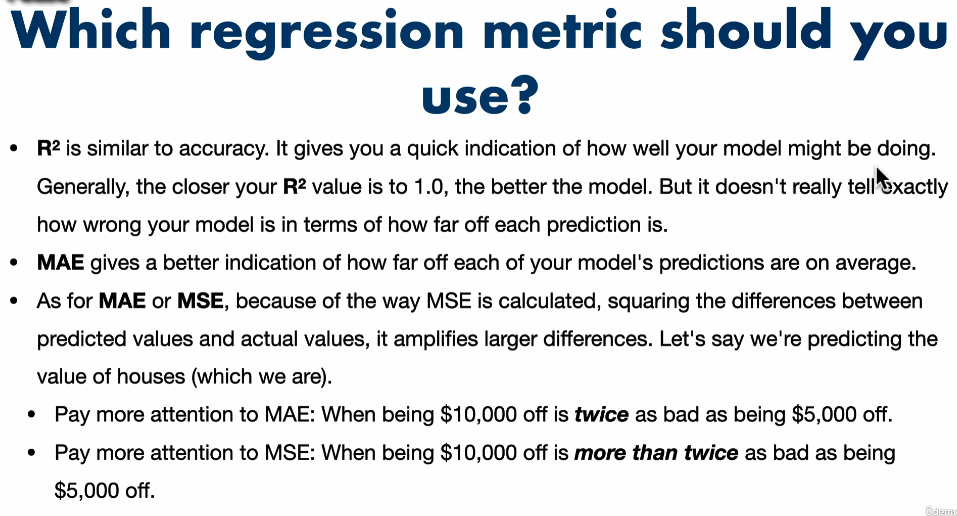

<p>Evaluating the results of a machine learning model is as important as building one.</p><p>But just like how different problems have different machine learning models, different machine learning models have different evaluation metrics.</p><p>Below are some of the most important evaluation metrics you'll want to look into for classification and regression models.</p><p><strong>Classification Model Evaluation Metrics/Techniques</strong></p><ul><li><p><strong>Accuracy</strong> - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.</p></li><li><p><a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score" rel="noopener noreferrer" target="_blank"><strong>Precision</strong></a> - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.</p></li><li><p><a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score" rel="noopener noreferrer" target="_blank"><strong>Recall</strong></a> - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.</p></li><li><p><a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score" rel="noopener noreferrer" target="_blank"><strong>F1 score</strong></a> - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.</p></li><li><p><a href="https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/" rel="noopener noreferrer" target="_blank"><strong>Confusion matrix</strong></a><strong> </strong>- Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagonal line).</p></li><li><p><a href="https://scikit-learn.org/stable/modules/cross_validation.html" rel="noopener noreferrer" target="_blank"><strong>Cross-validation</strong></a> - Splits your dataset into multiple parts and train and tests your model on each part then evaluates performance as an average. </p></li><li><p><a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html" rel="noopener noreferrer" target="_blank"><strong>Classification report</strong></a><strong> </strong>- Sklearn has a built-in function called <code>classification_report()</code> which returns some of the main classification metrics such as precision, recall and f1-score.</p></li><li><p><a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_score.html" rel="noopener noreferrer" target="_blank"><strong>ROC Curve</strong></a> - Also known as <a href="https://en.wikipedia.org/wiki/Receiver_operating_characteristic" rel="noopener noreferrer" target="_blank">receiver operating characteristic</a> is a plot of true positive rate versus false-positive rate.</p></li><li><p><a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html" rel="noopener noreferrer" target="_blank"><strong>Area Under Curve (AUC) Score</strong></a><strong> </strong>- The area underneath the ROC curve. A perfect model achieves an AUC&nbsp;score of 1.0.</p></li></ul><p><strong>Which classification metric should you use?</strong></p><ul><li><p><strong>Accuracy</strong> is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1).</p></li><li><p><strong>Precision</strong> and <strong>recall </strong>become more important when classes are imbalanced.</p></li><li><p>If false-positive predictions are worse than false-negatives, aim for higher precision.</p></li><li><p>If false-negative predictions are worse than false-positives, aim for higher recall.</p></li><li><p><strong>F1-score</strong> is a combination of precision and recall.</p></li><li><p>A confusion matrix is always a good way to visualize how a classification model is going.</p></li></ul><p><strong>Regression Model Evaluation Metrics/Techniques</strong></p><ul><li><p><a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html" rel="noopener noreferrer" target="_blank"><strong>R^2 (pronounced r-squared) or the coefficient of determination</strong></a> - Compares your model's predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, its R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1. </p></li><li><p><a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html" rel="noopener noreferrer" target="_blank"><strong>Mean absolute error (MAE)</strong></a> - The average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your predictions were.</p></li><li><p><a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html" rel="noopener noreferrer" target="_blank"><strong>Mean squared error (MSE)</strong></a> - The average squared differences between predictions and actual values. Squaring the errors removes negative errors. It also amplifies outliers (samples which have larger errors).</p></li></ul><p><strong>Which regression metric should you use?</strong></p><ul><li><p><strong>R2</strong> is similar to accuracy. It gives you a quick indication of how well your model might be doing. Generally, the closer your <strong>R2</strong> value is to 1.0, the better the model. But it doesn't really tell exactly how wrong your model is in terms of how far off each prediction is.</p></li><li><p><strong>MAE</strong> gives a better indication of how far off each of your model's predictions are on average.</p></li><li><p>As for <strong>MAE</strong> or <strong>MSE</strong>, because of the way MSE is calculated, squaring the differences between predicted values and actual values, it amplifies larger differences. Let's say we're predicting the value of houses (which we are).</p><ul><li><p>Pay more attention to MAE: When being $10,000 off is <strong><em>twice</em></strong> as bad as being $5,000 off.</p></li><li><p>Pay more attention to MSE: When being $10,000 off is <strong><em>more than twice</em></strong> as bad as being $5,000 off.</p></li></ul></li></ul><p>For more resources on evaluating a machine learning model, be sure to check out the following resources:</p><ul><li><p><a href="https://scikit-learn.org/stable/modules/model_evaluation.html" rel="noopener noreferrer" target="_blank">Scikit-Learn documentation for metrics and scoring (quantifying the quality of predictions)</a></p></li><li><p><a href="https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c" rel="noopener noreferrer" target="_blank">Beyond Accuracy: Precision and Recall by Will Koehrsen</a></p></li><li><p><a href="https://stackoverflow.com/a/37861832" rel="noopener noreferrer" target="_blank">Stack Overflow answer describing MSE (mean squared error) and RSME&nbsp;(root mean squared error)</a></p></li></ul>

<h1 style="color:red">lec 137:-NEW Evaluating A Model With Cross Validation And Scoring Parameters</h1>

### 4.2.3 Finally using the `scoring` parameter

In [162]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)

In [163]:
np.random.seed(42)

# cross-validation accuracy -> (cross-validation => spliting our data sets multiple times in random splits)
cv_acc = cross_val_score(clf,X,y,cv=5,scoring=None) # scoring is for scoring parameter if set None then estimator's default scoring evaluation metric(if available) is used.
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [164]:
# Cross-validated accuracy
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


In [165]:
np.random.seed(42)

cv_acc = cross_val_score(clf,X,y,cv=5,scoring ="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [166]:
# Cross-validated accuracy
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


In [167]:
# precision
np.random.seed(42)
cv_precision = cross_val_score(clf,X,y,cv=5,scoring ="precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [168]:
# Cross-validated precision
print(f"The cross-validated precision is: {np.mean(cv_precision)}")

The cross-validated precision is: 0.8329547346025924


In [169]:
# Recall
np.random.seed(42)
cv_recall = cross_val_score(clf,X,y,cv=5,scoring="recall")
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [170]:
# Cross-validated recall
print(f"The cross-validated recall is: {np.mean(cv_recall)}")

The cross-validated recall is: 0.8545454545454545


Let's see the `scoring` parameter being using for a regression problem...

In [171]:
"""
scoring arguments-->
neg_mean_absolute_error = metrics.mean_absolute_error (neg means negative)
neg_mean_squared_error = metrics.mean_squared_error
r2 = metrics.r2_score
"""
np.random.seed(42)
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

X = housing_df.drop("target",axis=1)
y= housing_df.target

model = RandomForestRegressor(n_estimators=100)

In [172]:
# r2_score
np.random.seed(42)
cv_r2 = cross_val_score(model,X,y,cv=3,scoring="r2")
np.mean(cv_r2)

np.float64(0.6545458023124507)

In [173]:
# Mean squared error
np.random.seed(42)
cv_mse = cross_val_score(model,X,y,cv=3,scoring="neg_mean_squared_error")
np.mean(cv_mse)

np.float64(-0.46141356443710196)

In [174]:
cv_mse

array([-0.51017222, -0.33368897, -0.5403795 ])

In [175]:
# Mean absolute error
np.random.seed(42)
cv_mae = cross_val_score(model,X,y,cv=3,scoring="neg_mean_absolute_error")
np.mean(cv_mae)

np.float64(-0.4835773816036823)

In [176]:
cv_mae

array([-0.51754565, -0.42678172, -0.50640477])

<h1 style="color:red">lec 138:-NEW Evaluating A Model With Scikitlearn Functions</h1>

## 4.3 Using different evaluation metrics as Scikit-Learn functions

The 3rd way to evaluate scikit-learn machine learning models/estimators is to using the `sklearn.metrics` module- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

In [177]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Create X & y
X = heart_disease.drop("target",axis=1)
y= heart_disease.target

# Split data
X_test,X_train,y_test,y_train = train_test_split(X,y,test_size=0.2)

# create model
clf = RandomForestClassifier(n_estimators=100)

# Fit model
clf.fit(X_train,y_train)
y_preds = clf.predict(X_test)

# Evaluate model using evaluation functions
print("accuracy score is: ",accuracy_score(y_test,y_preds))
print("precision score is: ",precision_score(y_test,y_preds))
print("recall score is: ",recall_score(y_test,y_preds))
print("f1 score is: ",f1_score(y_test,y_preds))

accuracy score is:  0.8181818181818182
precision score is:  0.8088235294117647
recall score is:  0.859375
f1 score is:  0.8333333333333334


In [178]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Create X & y
X = housing_df.drop("target",axis=1)
y= housing_df.target

# Split data
X_test,X_train,y_test,y_train = train_test_split(X,y,test_size=0.2)

# create model
model = RandomForestRegressor(n_estimators=100)

# Fit model
model.fit(X_train,y_train)
y_preds = model.predict(X_test)

# Evaluate model using evaluation functions
print("r2_score is: ",r2_score(y_test,y_preds))
print("mean_absolute_error is: ",mean_absolute_error(y_test,y_preds))
print("mean_squared_error is: ",mean_squared_error(y_test,y_preds))

r2_score is:  0.7557956902793121
mean_absolute_error is:  0.3895815048207365
mean_squared_error is:  0.3247534599416524


<h1 style="color:red">lec 139:-Improving A Machine Learning Model</h1>

## 5. Improving a model

First predictions = baseline predictions.
First model = baseline model.

From a data perspective:
* Could we collect more data? (generally,the more data,the better)
* Could we improve our data?

From model perspective:
* Is there any better model we could use?
* Could we improve the current model?


Hyperparameters vs. Parameters:
* Parameters = model find these patterns in data
* HyperParameters = settings on a model you can adjust to (potentially) improve its ability to find patterns

Three ways to adjust hyperparameters:
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [179]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [180]:
clf.get_params() # in reality these are hyperparameters but for python they are parameters

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

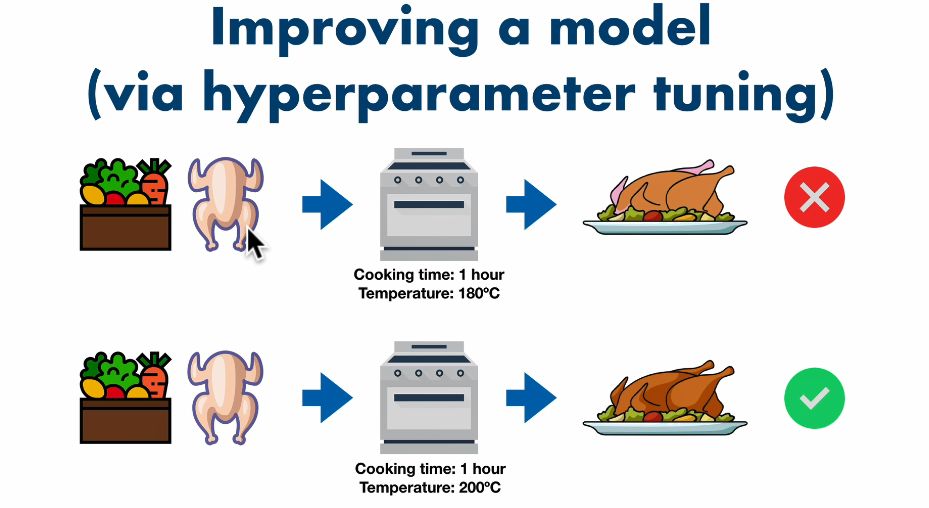

<h1 style="color:red">lec 140:-Tuning Hyperparameters</h1>

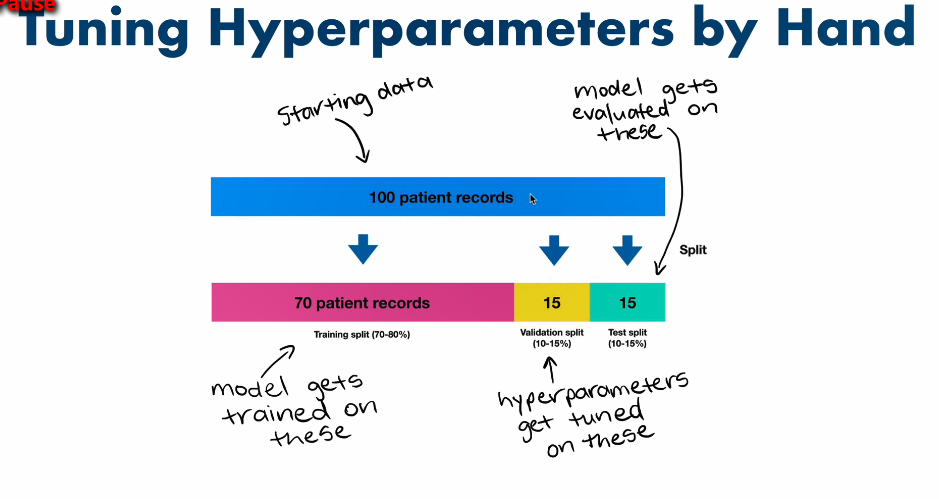
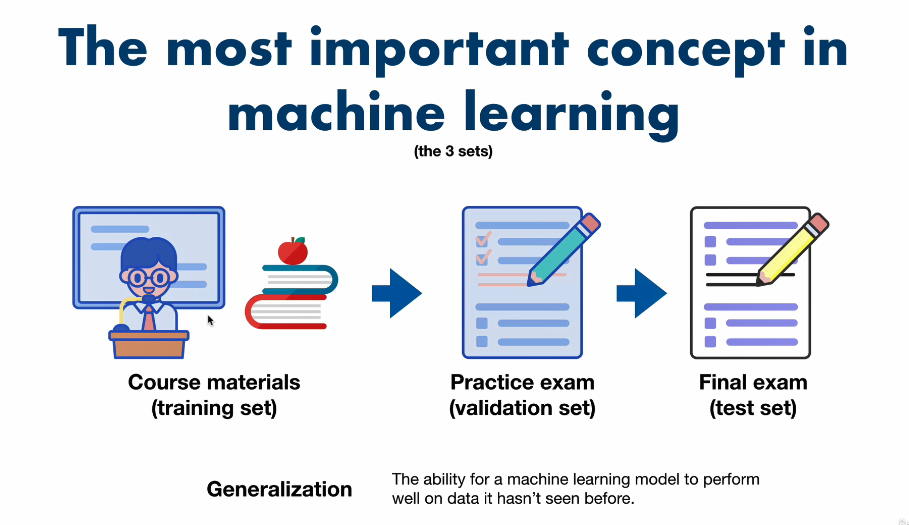

### 5.1 Tuning hyperparameters by hand

Let's make 3 sets, training, validation and test.

In [181]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

<br>
<hr>
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html">Source for hyperparameter's details</a>

We're going to try and adjust:

* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [194]:
def evaluate_preds(y_true,y_preds):
    """
    Performs evaluation comparison on y_true labels vs y_preds labels
    on a classification model.
    """
    accuracy = accuracy_score(y_true,y_preds)
    precision = precision_score(y_true,y_preds)
    recall = recall_score(y_true,y_preds)
    f1 = f1_score(y_true,y_preds)
    metric_dict = {"accuracy":round(accuracy,2),
                  "precision":round(precision,2),
                  "recall":round(recall,2),
                  "f1":round(f1,2)}
    print(f"Acc: {accuracy*100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1: {f1:.2f}")
    return metric_dict

In [195]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data (so we can split train,validate,test randomly)
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into X & y
X = heart_disease_shuffled.drop("target",axis=1)
y = heart_disease_shuffled.target

# Split the data into train, validation & test sets
train_split=round(0.7*len(heart_disease_shuffled)) # 70% of data
valid_split=round(train_split+ 0.15*len(heart_disease_shuffled)) # 15% of data
X_train,y_train = X[:train_split],y[:train_split]
X_valid,y_valid = X[train_split:valid_split],y[train_split:valid_split]
X_test,y_test = X[valid_split:],y[valid_split:]

clf = RandomForestClassifier() # without anything passing here it will use baseline parameters
clf.fit(X_train,y_train)

# Make baseline predictions
y_preds = clf.predict(X_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid,y_preds)

Acc: 82.22%
Precision: 0.81
Recall: 0.88
F1: 0.85


In [199]:
np.random.seed(42)

# Create a second classifier with different hyperparameters
clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(X_train,y_train)

# Make prediction with different hyperparameters
y_preds_2 = clf_2.predict(X_valid)

# Evaluate the 2nd classifier
clf_2_metrics = evaluate_preds(y_valid,y_preds_2)

Acc: 82.22%
Precision: 0.84
Recall: 0.84
F1: 0.84


In [200]:
np.random.seed(42)

# Create a second classifier with different hyperparameters
clf_3 = RandomForestClassifier(n_estimators=100,max_depth=10)
clf_3.fit(X_train,y_train)

# Make prediction with different hyperparameters
y_preds_3 = clf_3.predict(X_valid)

# Evaluate the 2nd classifier
clf_3_metrics = evaluate_preds(y_valid,y_preds_3)

Acc: 80.00%
Precision: 0.81
Recall: 0.84
F1: 0.82


<h1 style="color:red">lec 141:-Tuning Hyperparameters 2</h1>

### 5.2 Hyperparameter tuning with RandomizedSearchCV

In [206]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators":[10,100,200,500,1000,1200],
       "max_depth":[None,5,10,20,30],
       "max_features":["sqrt","log2",None], # remove auto becuase scikit-learn>=1.2 auto is no longer accepted in max_features
       "min_samples_split":[2,4,6],
       "min_samples_leaf":[1,2,4]}

np.random.seed(42)

# Split into X & y
X = heart_disease_shuffled.drop("target",axis=1)
y= heart_disease_shuffled.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1) # n_jobs how many cores you can give

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                           param_distributions=grid, # grid dictionary
                           n_iter=10, # number of models to try
                           cv=5,
                           verbose=2)

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train,y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=30, max_features=None, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.2s
[CV] END max_depth=30, max_features=None, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.2s
[CV] END max_depth=30, max_features=None, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.2s
[CV] END max_depth=30, max_features=None, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.4s
[CV] END max_depth=30, max_features=None, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.4s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   1.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   1.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=6, n_est

In [207]:
# now for seeing best params

rs_clf.best_params_

{'n_estimators': 1200,
 'min_samples_split': 6,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 30}

In [208]:
# MAke predictions with best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test,rs_y_preds)

Acc: 83.61%
Precision: 0.78
Recall: 0.89
F1: 0.83


In [209]:
# not getting any better result then default so it's not necessary that we
# always get better result it depends upon your grid

<h1 style="color:red">lec 142:-Tuning Hyperparameters 3</h1>

### 5.3 Hyperparameters tuning with GridSearchCV

In [211]:
grid # GridSearchCV is like bruteforce it checks all single combinations

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['sqrt', 'log2', None],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [213]:
6*5*3*3*3*5 #(5 is for crossvalidation) # total 4050 times

4050

In [214]:
# let's reduce search space so we can do it in our laptop
grid_2={'n_estimators': [ 500, 1000, 1200],
         'max_depth': [30],
         'max_features': [ 'log2', None],
         'min_samples_split': [ 6],
         'min_samples_leaf': [2, 4]}

# our best_params_ from RandomizedSearchCV are 1200,6,4,log2,30

In [217]:
from sklearn.model_selection import GridSearchCV,train_test_split

np.random.seed(42)

# Split into X & y
X = heart_disease_shuffled.drop("target",axis=1)
y= heart_disease_shuffled.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1) # n_jobs how many cores you can give

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                           param_grid=grid_2, # grid dictionary
                           # n_iter=10, not here because it is bruteforce
                           cv=5,
                           verbose=2)

# Fit the RandomizedSearchCV version of clf
gs_clf.fit(X_train,y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.6s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.7s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.7s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.7s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.7s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=1000; total time=   1.6s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=1000; total time=   1.4s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=1

In [218]:
gs_clf.best_params_

{'max_depth': 30,
 'max_features': 'log2',
 'min_samples_leaf': 4,
 'min_samples_split': 6,
 'n_estimators': 1200}

In [219]:
gs_y_preds = gs_clf.predict(X_test)

# evaluate the predictons
gs_metrics = evaluate_preds(y_test,gs_y_preds)

Acc: 83.61%
Precision: 0.78
Recall: 0.89
F1: 0.83


### RandomizedSerachCV for optimal parameters then apply GridSearchCV around the values of those optimal parameters in grid

<br>
<hr>
Let's compare our different models metrics

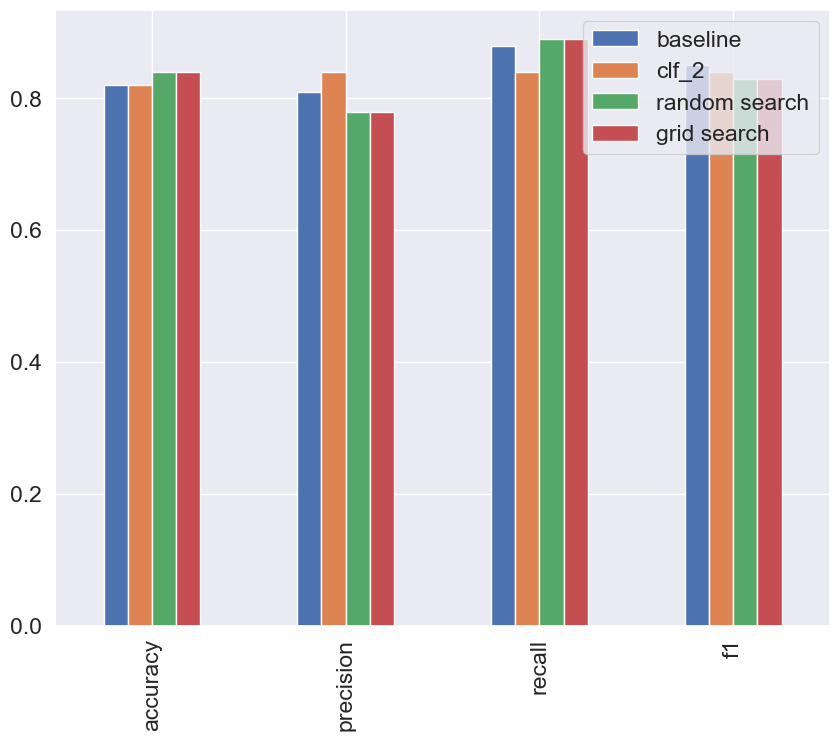

In [220]:
compare_metrics = pd.DataFrame({"baseline":baseline_metrics,
                                "clf_2":clf_2_metrics,
                                "random search":rs_metrics,
                                "grid search":gs_metrics})

compare_metrics.plot.bar(figsize=(10,8));

<p>In the previous video, we compared the metric results of 3 different models. However, there was a small error.</p><p>As always, when comparing models, you should be careful to make sure they're compared on the same splits of data.</p><p>For example, let's say you have <code>model_1</code> and <code>model_2</code> which each differ slightly.</p><p>If you want to compare and evaluate their results, <code>model_1</code> and <code>model_2</code> should both be trained on the same data (e.g. <code>X_train</code> and <code>y_train</code>) and their predictions should each be made on the same data, for example:</p><ul><li><p><code>model_1.fit(X_train, y_train)</code> -&gt; <code>model_1.predict(X_test)</code> -&gt; <code>model_1_preds</code></p></li><li><p><code>model_2.fit(X_train, y_train)</code> -&gt; <code>model_2.predict(X_test)</code> -&gt; <code>model_2_preds</code></p></li></ul><p>Note the differences here being the two models and the 2 different sets of predictions which can be compared against each other.</p><p>The example in the video followed these steps but since the data was split differently for the baseline model, the comparisons aren't fully correct.</p><p>An example end-to-end notebook with the correct methodology has been created on Google Colab here:</p><p><a href="https://colab.research.google.com/drive/1ISey96a5Ag6z2CvVZKVqTKNWRwZbZl0m" rel="noopener noreferrer" target="_blank">https://colab.research.google.com/drive/1ISey96a5Ag6z2CvVZKVqTKNWRwZbZl0m</a></p><p>The short notebook compares 3 different models on the heart disease dataset.</p><ol><li><p>A baseline <code>RandomForestClassifier</code> (all default parameters)</p></li><li><p>A <code>RandomForestClassifier</code> tuned with <code>RandomizedSearchCV</code></p></li><li><p>A <code>RandomForestClassifier</code> tuned with <code>GridSearchCV</code></p></li></ol><p>The most important part is they all use the same data splits created using <code>train_test_split()</code> and <code>np.random.seed(42)</code>.</p><p>Thank you to Ricardo for <a href="https://www.udemy.com/course/complete-machine-learning-and-data-science-zero-to-mastery/learn/#questions/10054312/" rel="noopener noreferrer" target="_blank">pointing this out</a>.</p>

<h1 style="color:red">lec 144:-Quick Tip Correlation Analysis</h1>

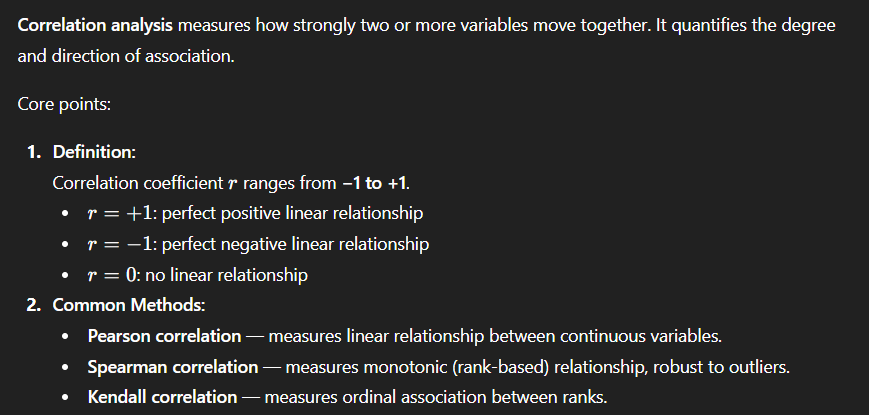

In [221]:
# Computation (Python / pandas):
import pandas as pd

corr_matrix = df.corr(method='pearson')  # or 'spearman', 'kendall'
print(corr_matrix)


                     actual values  predict values  differences  \
actual values             1.000000        0.898332     0.364850   
predict values            0.898332        1.000000     0.304857   
differences               0.364850        0.304857     1.000000   
squared_differences       0.308310        0.216255     0.900279   

                     squared_differences  
actual values                   0.308310  
predict values                  0.216255  
differences                     0.900279  
squared_differences             1.000000  


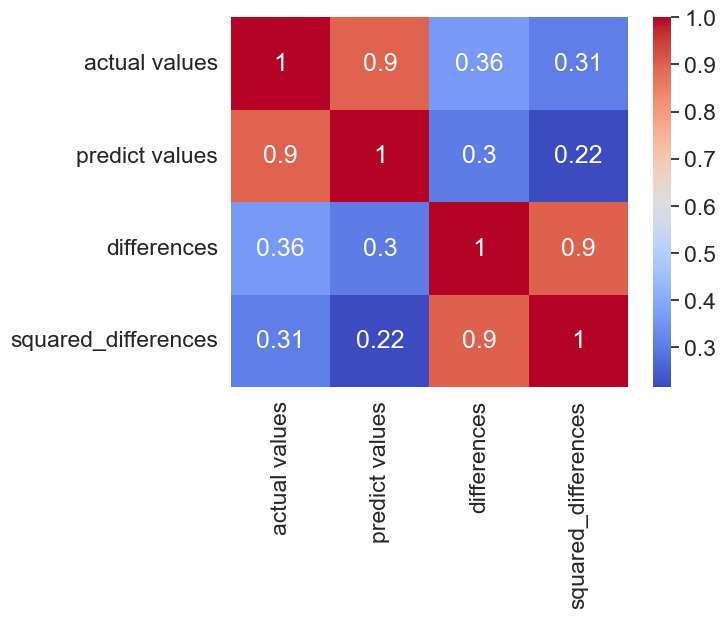

In [222]:
# Visualization:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


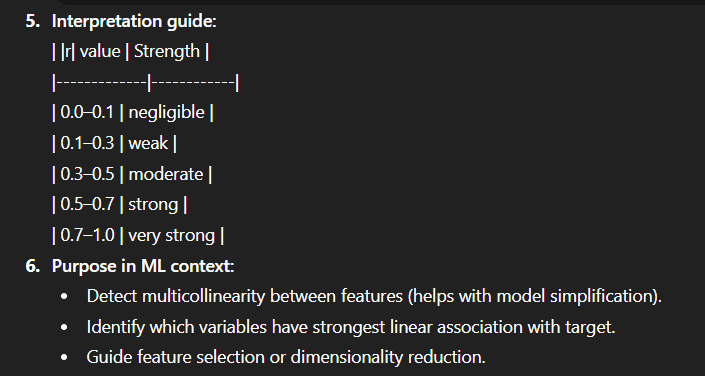

# Forward/Backward Attribute Selection
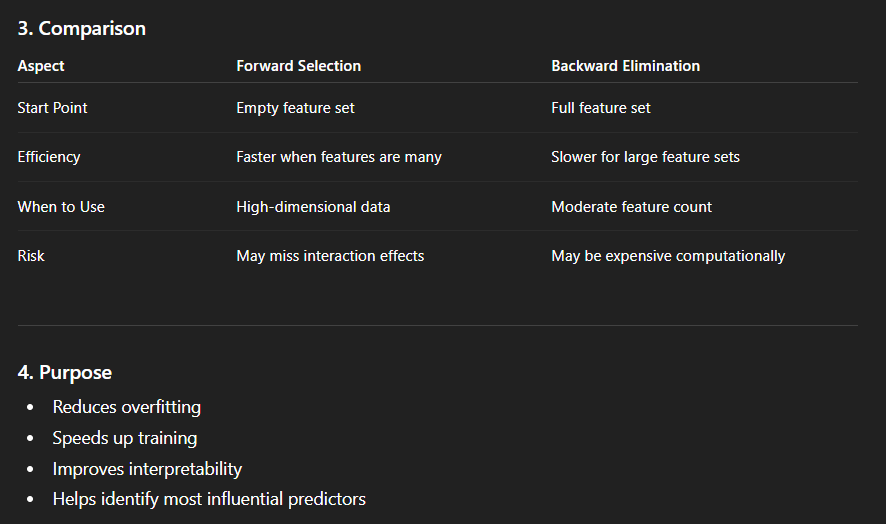

<h1 style="color:red">lec 145:-Saving And Loading A Model</h1>

## 6. Saving and loading trained machine learning models

Two ways to save and load machine learning models:
1. With Python's `pickle` module
2. With the `joblib` module

**Pickle**

In [226]:
import pickle

# Save an existing model to file
#pickle.dump(gs_clf,open("gs_random_random_forest_model.pkl","wb"))

with open("gs_random_random_forest_model.pkl", "wb") as f:
    pickle.dump(gs_clf, f)


In [229]:
# Load a saved model
with open("gs_random_random_forest_model.pkl", "rb") as f:
    loaded_pickle_model=pickle.load( f)

In [230]:
# Make some predictions
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test,pickle_y_preds) # same as gs_metrics

Acc: 83.61%
Precision: 0.78
Recall: 0.89
F1: 0.83


{'accuracy': 0.84, 'precision': 0.78, 'recall': 0.89, 'f1': 0.83}

<h1 style="color:red">lec 146:-Saving And Loading A Model 2</h1>

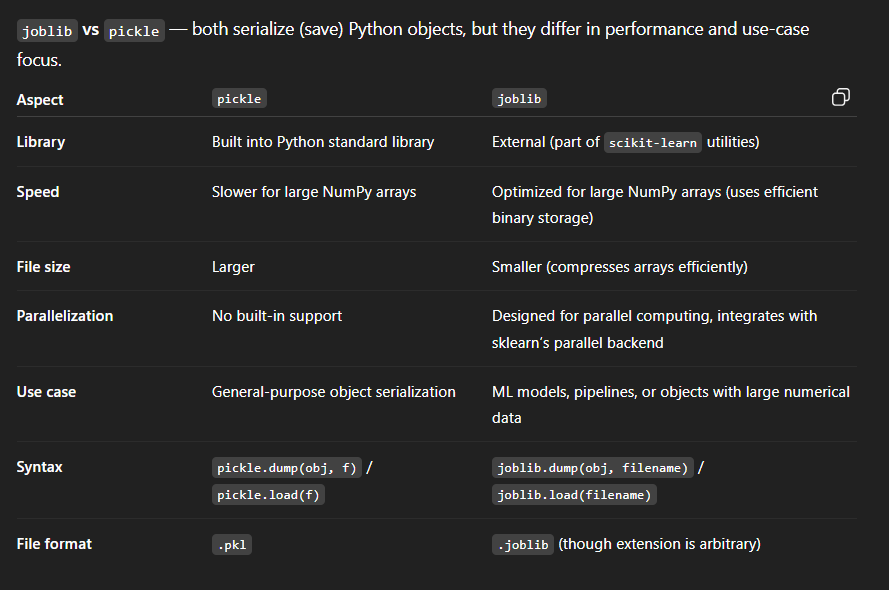
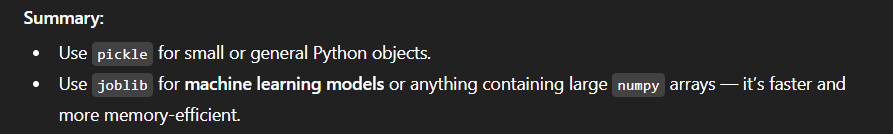

**Joblib**

In [231]:
from joblib import dump,load

# Save model to file
dump(gs_clf,filename="gs_random_forest_model_1.joblib")

['gs_random_forest_model_1.joblib']

In [233]:
# Import a saved joblib model
loaded_joblib_model = load(filename="gs_random_forest_model_1.joblib")

In [234]:
# Make and evalaute joblib predictions
joblib_y_preds = loaded_joblib_model.predict(X_test)
evaluate_preds(y_test,joblib_y_preds)

Acc: 83.61%
Precision: 0.78
Recall: 0.89
F1: 0.83


{'accuracy': 0.84, 'precision': 0.78, 'recall': 0.89, 'f1': 0.83}

<h1 style="color:red">lec 147:-Putting It All Together</h1>

# 7. Putting it all together!

pipeline class for do all this -> https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

In [235]:
data = pd.read_csv("./teacher-materials/data/car-sales-extended-missing-data.csv")
data

Make Colour  Odometer (KM)  Doors    Price
0     Honda  White        35431.0    4.0  15323.0
1       BMW   Blue       192714.0    5.0  19943.0
2     Honda  White        84714.0    4.0  28343.0
3    Toyota  White       154365.0    4.0  13434.0
4    Nissan   Blue       181577.0    3.0  14043.0
..      ...    ...            ...    ...      ...
995  Toyota  Black        35820.0    4.0  32042.0
996     NaN  White       155144.0    3.0   5716.0
997  Nissan   Blue        66604.0    4.0  31570.0
998   Honda  White       215883.0    4.0   4001.0
999  Toyota   Blue       248360.0    4.0  12732.0

[1000 rows x 5 columns]

In [236]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [237]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Steps we want to do (all in one cell):
1. Fill missing data
2. Convert data to numbers
3. Build a model on the data

In [241]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer # for missing data
from sklearn.preprocessing import OneHotEncoder # for convert data to numerical value

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(42)

# Import data and drop rows with missing labels
data = pd.read_csv("./teacher-materials/data/car-sales-extended-missing-data.csv")
data = data.dropna(subset=["Price"])

# Define different features and transformer pipeline
categorical_features = ["Make","Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer",SimpleImputer(strategy ="constant",fill_value="missing")),
    ("onehot",OneHotEncoder(handle_unknown="ignore"))
])

door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="constant",fill_value=4))
])

numeric_feature = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="mean"))
])

# setup preprocessing steps (fill missing values,then convert to numbers)
preprocessor = ColumnTransformer(
                    transformers=[
                        ("cat",categorical_transformer,categorical_features),
                        ("door",door_transformer,door_feature),
                        ("num",numeric_transformer,numeric_feature)
                    ])

# Creating a preprocessing and modelling pipeline
model = Pipeline(steps=[
            ("preprocessor",preprocessor),
            ("regressor",RandomForestRegressor())
])

# Split the data
X = data.drop("Price",axis=1)
y= data.Price
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Fit and score the model
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.22188417408787875

reading-resource--> https://colab.research.google.com/drive/1AX3Llawt0zdjtOxaYuTZX69dhxwinFDi?usp=sharing

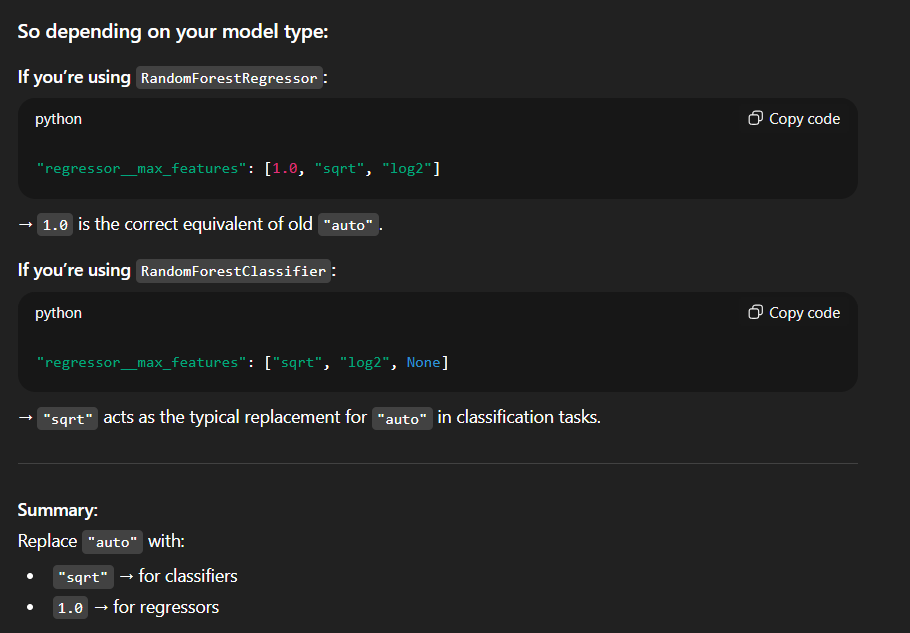

<h1 style="color:red">lec 148:-Putting It All Together 2</h1>

It's also possible to use `GridSearchCV` or `RandomizedSearchCV` with our `Pipeline`

In [242]:
# Use GridSearchCV with our regression Pipeline
from sklearn.model_selection import GridSearchCV

pipe_grid = {
    "preprocessor__num__imputer__strategy":["mean","median"], # preprocessor string in pipeline then num string then imputer and in imputer in strategy we are going to use mean and then median
    "regressor__n_estimators":[100,1000],
    "regressor__max_depth":[None,5],
    "regressor__max_features":[1.0],
    "regressor__min_samples_split":[2,4]
}

gs_model = GridSearchCV(model,pipe_grid,cv=5,verbose=2)
gs_model.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END preprocessor__num__imputer__strategy=mean, regressor__max_depth=None, regressor__max_features=1.0, regressor__min_samples_split=2, regressor__n_estimators=100; total time=   0.3s
[CV] END preprocessor__num__imputer__strategy=mean, regressor__max_depth=None, regressor__max_features=1.0, regressor__min_samples_split=2, regressor__n_estimators=100; total time=   0.2s
[CV] END preprocessor__num__imputer__strategy=mean, regressor__max_depth=None, regressor__max_features=1.0, regressor__min_samples_split=2, regressor__n_estimators=100; total time=   0.3s
[CV] END preprocessor__num__imputer__strategy=mean, regressor__max_depth=None, regressor__max_features=1.0, regressor__min_samples_split=2, regressor__n_estimators=100; total time=   0.3s
[CV] END preprocessor__num__imputer__strategy=mean, regressor__max_depth=None, regressor__max_features=1.0, regressor__min_samples_split=2, regressor__n_estimators=100; total time=   0.3s

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Doors']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer '
                                                                          '(KM)'])])),
                                       ('regressor', RandomForestRegressor())]),
             param_grid={'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median'],
                         'regressor__max_depth': [None, 5],
                         'regressor__max_features': [1.0],
                         'regressor__min_samples_split': [2, 4],
                         'regressor__n_estimators': [100, 1000]},
             verbose=2)

In [243]:
gs_model.score(X_test,y_test)

0.3336930537413264

In [246]:
gs_model.best_params_

{'preprocessor__num__imputer__strategy': 'mean',
 'regressor__max_depth': 5,
 'regressor__max_features': 1.0,
 'regressor__min_samples_split': 2,
 'regressor__n_estimators': 1000}

<br>
<hr>
<p>In this assignment, you'll get hands-on with a notebook which has a series of exercises based on the Scikit-Learn code and concepts we went through in the previous videos.</p><p>Download the Scikit-Learn exercises and solutions notebooks from GitHub and work through each cell in the exercises notebook using what you've learned in the previous videos.</p><ul><li><p><a href="https://github.com/mrdbourke/zero-to-mastery-ml/blob/master/section-2-data-science-and-ml-tools/scikit-learn-exercises.ipynb" rel="noopener noreferrer" target="_blank">Scikit-Learn Exercises notebook</a></p></li><li><p><a href="https://github.com/mrdbourke/zero-to-mastery-ml/blob/master/section-2-data-science-and-ml-tools/scikit-learn-exercises-solutions.ipynb" rel="noopener noreferrer" target="_blank">Scikit-Learn Exercises Solutions notebook</a> (avoid looking at this for as long as possible)</p></li></ul><p>Don't forget, if you get stuck, there's plenty of help available!</p><p>Remember, you should always try to run the code yourself first.</p><p>If you're still stuck feel free to ask the Discord server (Checkout the <strong>#machinelearning-datascience </strong>channel for help) or search the internet for answers. </p><p><strong>Note:</strong> In the notebook, there may be instructions to import a file from a file path such as <code>"../data/car-sales.csv"</code>, you should change these to wherever you're storing <code>"car-sales.csv"</code>. Or the direct link on GitHub (in raw format), such as, <a href="https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales.csv" rel="noopener noreferrer" target="_blank"><code>https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales.csv</code></a>.</p><p>After working through the Scikit-Learn exercises notebook, how did you go?</p><p>Again, whether you blazed through them all or got stuck multiple times and had to look at the documentation or go back to the lectures, it's all part of the process.</p><p>Practising different exercises and writing code on your own is the best way to practice different concepts.</p>